In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from sklearn.metrics import recall_score,precision_score,accuracy_score,classification_report,confusion_matrix,f1_score
import scipy.stats as stats

# EDA of Original Dataset

In [ ]:
df1=pd.read_csv('/content/dataset_RT_prepared (1).csv')

<ipython-input-2-07ec53ab013e>:1: DtypeWarning: Columns (11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df1=pd.read_csv('/content/dataset_RT_prepared (1).csv')


In [ ]:
df=df1

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20247 entries, 0 to 20246
Data columns (total 56 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   vacancy_type                            20247 non-null  object 
 1   id_resumes                              20247 non-null  object 
 2   area_orig                               20238 non-null  object 
 3   salary_orig                             13591 non-null  object 
 4   created_at_orig                         20247 non-null  object 
 5   updated_at_orig                         20247 non-null  object 
 6   title                                   20247 non-null  object 
 7   created_at_res                          20247 non-null  object 
 8   updated_at_res                          20246 non-null  object 
 9   age                                     17281 non-null  float64
 10  certificate                             20246 non-null  ob

In [ ]:
df.shape

(20247, 56)

In [ ]:
df.head(10)

vacancy_type                              id_resumes  \
0                       Агент ГАП   fdd67c8e000bc710fb00000abc743663525255   
1                       Агент ГАП   8af40b79000e339ca900000abc386e774f434c   
2  Менеджер по сохранению клиентов  d6da02dc000e454a3400000abc59534e6f5938   
3                       Агент ГАП   973a480f000b7cb9f600000abc486b4b585247   
4                       Агент ГАП   8b05e3f5000c32c3d800000abc52366a7a444e   
5                         Агент ТМ  8a744008000c7c4d6a00000abc3165744f7254   
6                       Агент ГАП   e596cc120008c5c7b700000abc5a7331366b68   
7                       Агент ГАП   f2390388000cfb06b300000abc746364455979   
8                       Агент ГАП   023c4e67000e1a797400000abc46686e7a6d57   
9                         Агент ТМ  7f15bfb1000c81604100000abc386855657a48   

         area_orig                           salary_orig  \
0             Чита                                   NaN   
1             Чита  {'amount': 40000, 'currency': 'RUR'}   
2        Краснодар  {'amount': 70000, 'currency': 'RUR'}   
3             Чита                                   NaN   
4             Чита                                   NaN   
5         Оренбург  {'amount': 30000, 'currency': 'RUR'}   
6             Чита  {'amount': 35000, 'currency': 'RUR'}   
7          Саратов  {'amount': 25000, 'currency': 'RUR'}   
8  Нижний Новгород  {'amount': 30000, 'currency': 'RUR'}   
9  Нижний Новгород                                   NaN   

            created_at_orig           updated_at_orig  \
0  2023-03-06T18:59:28+0300  2025-01-08T16:18:32+0300   
1  2025-01-07T13:01:03+0300  2025-01-07T13:05:04+0300   
2  2025-01-19T17:04:15+0300  2025-01-19T17:04:15+0300   
3  2022-11-28T07:02:54+0300  2025-01-05T02:54:27+0300   
4  2023-07-21T15:48:40+0300  2025-01-03T16:14:09+0300   
5  2023-10-13T17:16:59+0300  2024-12-28T23:32:35+0300   
6  2021-03-09T09:28:03+0300  2025-01-03T15:20:55+0300   
7  2024-03-19T00:00:14+0300  2024-11-05T14:41:13+0300   
8  2024-12-07T03:15:22+0300  2025-01-04T17:01:36+0300   
9  2023-10-19T16:44:19+0300  2025-01-05T00:22:24+0300   

                     title            created_at_res  \
0    Начинающий специалист  2023-03-06T18:59:28+0300   
1    Начинающий специалист  2025-01-07T13:01:03+0300   
2     Оператор call-центра  2025-01-19T17:04:15+0300   
3  Системный администратор  2022-11-28T07:02:54+0300   
4    Начинающий специалист  2023-07-21T15:48:40+0300   
5   Специалист по продажам  2023-10-13T17:16:59+0300   
6     Продавец-консультант  2021-03-09T09:28:03+0300   
7    Начинающий специалист  2024-03-19T00:00:14+0300   
8               специалист  2024-12-07T03:15:22+0300   
9                 Продюсер  2023-10-19T16:44:19+0300   

             updated_at_res   age  ...  \
0  2025-01-08T16:18:32+0300  18.0  ...   
1  2025-01-07T13:05:04+0300  19.0  ...   
2  2025-01-19T17:04:15+0300   NaN  ...   
3  2025-01-05T02:54:27+0300  25.0  ...   
4  2025-01-03T16:14:09+0300  17.0  ...   
5  2025-01-28T16:59:40+0300  20.0  ...   
6  2025-01-03T15:20:55+0300  32.0  ...   
7  2024-11-05T14:41:13+0300  23.0  ...   
8  2025-01-04T17:01:36+0300   NaN  ...   
9  2025-01-05T00:22:24+0300  23.0  ...   

                          education.primary.result education.primary.year  \
0                                              NaN                    NaN   
1  Специалист по земельно-имущественным отношениям                 2024.0   
2                      Воспитательная деятельность                 2019.0   
3                   Архитектор компьютерных систем                 2020.0   
4                                              NaN                    NaN   
5              Судебная и прокуроская деятельность                 2029.0   
6                                              NaN                    NaN   
7                                            Химик                 2024.0   
8                              Педагог английского                 2027.0   
9                       

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime

sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)


print(f"Dataset shape: {df.shape}")
print("\nMissing values per column:")
display(df.isnull().sum().sort_values(ascending=False).head(15))

Dataset shape: (20247, 56)

Missing values per column:


experience.industry.id                  20067
experience.industry.name                20067
education.primary.organization_id       18000
experience.area.id                      16352
experience.area.name                    16352
education.primary.result_id             15725
last_negotiation.employer_state.name    15362
last_negotiation.employer_state.id      15362
last_negotiation.created_at             15362
experience.industries.id                14370
experience.industries.name              14370
experience.employer.id                  14185
experience.employer.name                14185
experience.company_id                   13682
experience.end                          13472
dtype: int64

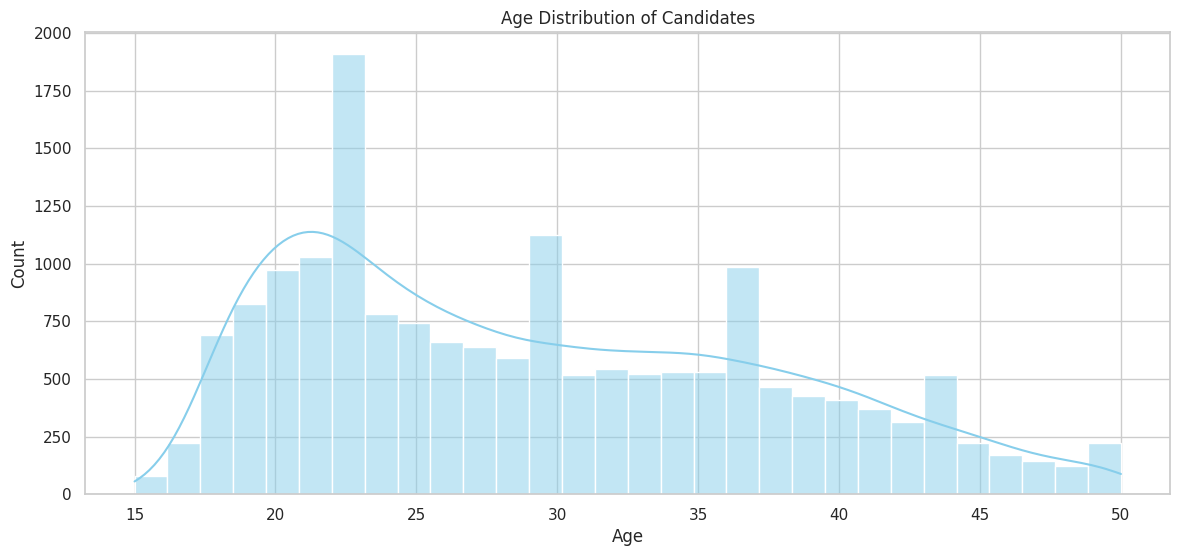

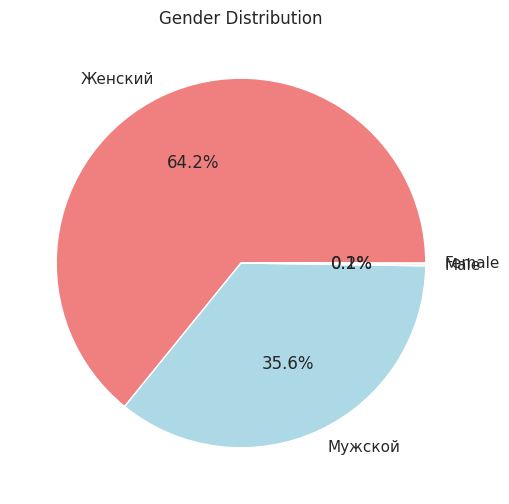

In [ ]:
plt.figure(figsize=(14, 6))
sns.histplot(df['age'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Age Distribution of Candidates')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

if 'gender.name' in df.columns:
    plt.figure(figsize=(8, 6))
    gender_counts = df['gender.name'].value_counts()
    gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
    plt.title('Gender Distribution')
    plt.ylabel('')
    plt.show()

<ipython-input-9-494fed7a01cf>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')


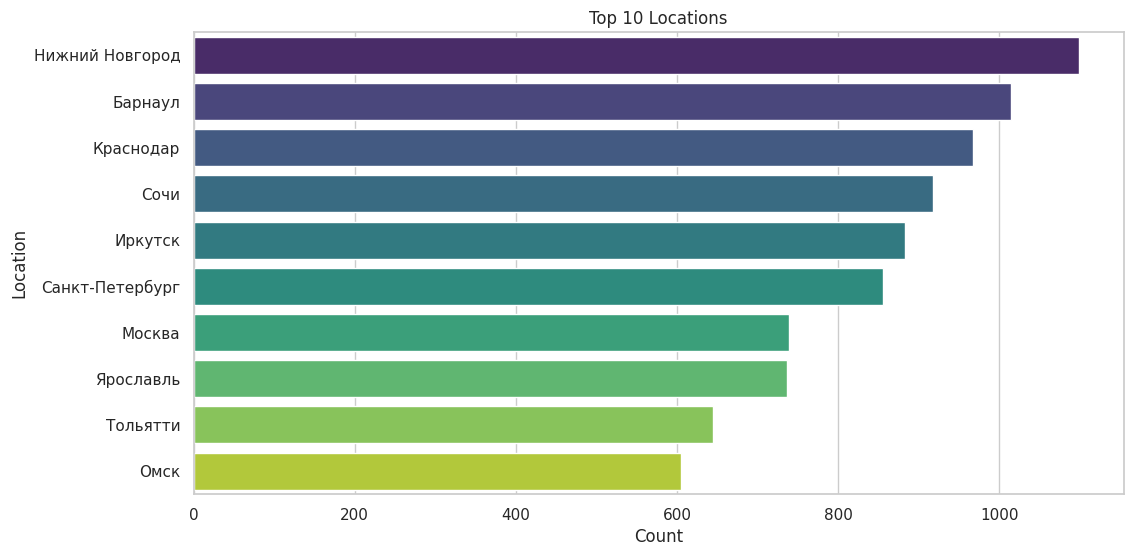

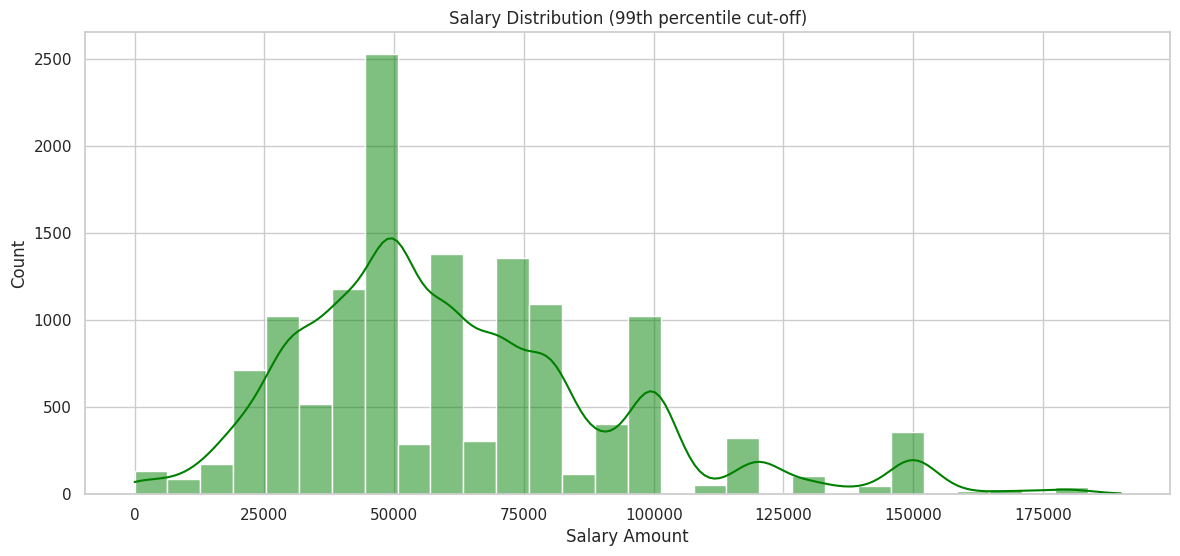

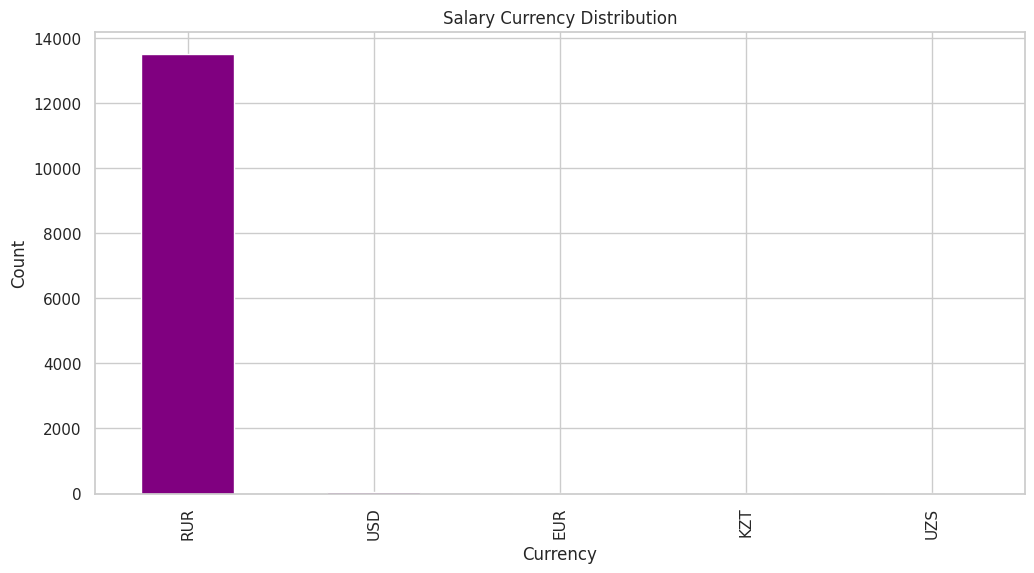

In [ ]:
if 'area.name' in df.columns:
    top_locations = df['area.name'].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=top_locations.values, y=top_locations.index, palette='viridis')
    plt.title('Top 10 Locations')
    plt.xlabel('Count')
    plt.ylabel('Location')
    plt.show()

if 'salary.amount' in df.columns:
    salary_data = df[df['salary.amount'] < df['salary.amount'].quantile(0.99)]

    plt.figure(figsize=(14, 6))
    sns.histplot(salary_data['salary.amount'].dropna(), bins=30, kde=True, color='green')
    plt.title('Salary Distribution (99th percentile cut-off)')
    plt.xlabel('Salary Amount')
    plt.ylabel('Count')
    plt.show()

    if 'salary.currency' in df.columns:
        plt.figure(figsize=(12, 6))
        df['salary.currency'].value_counts().plot(kind='bar', color='purple')
        plt.title('Salary Currency Distribution')
        plt.xlabel('Currency')
        plt.ylabel('Count')
        plt.show()

<ipython-input-10-8023260e0841>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=edu_counts.values, y=edu_counts.index, palette='rocket')


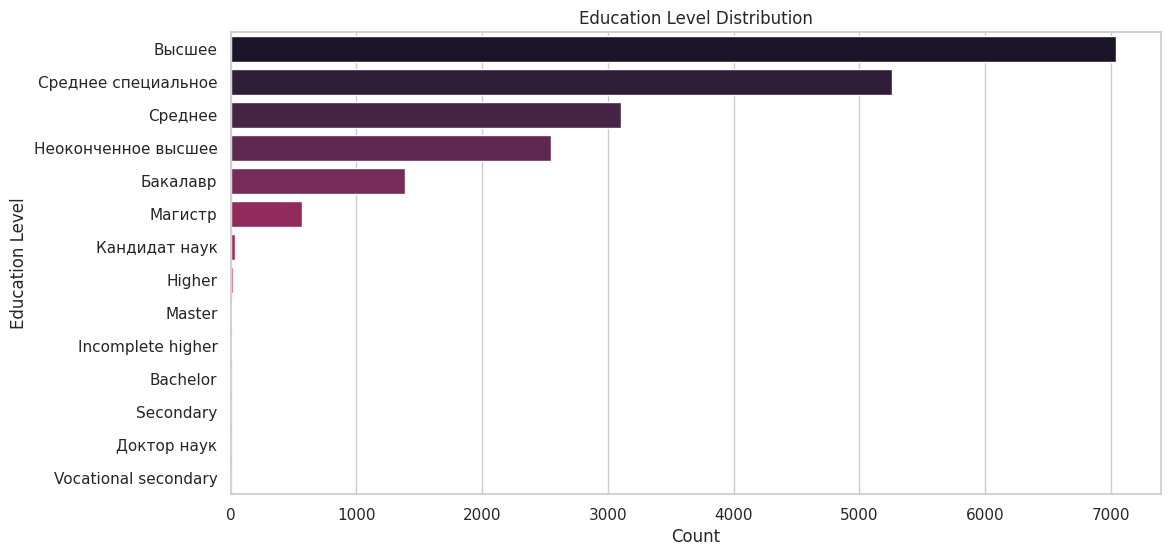

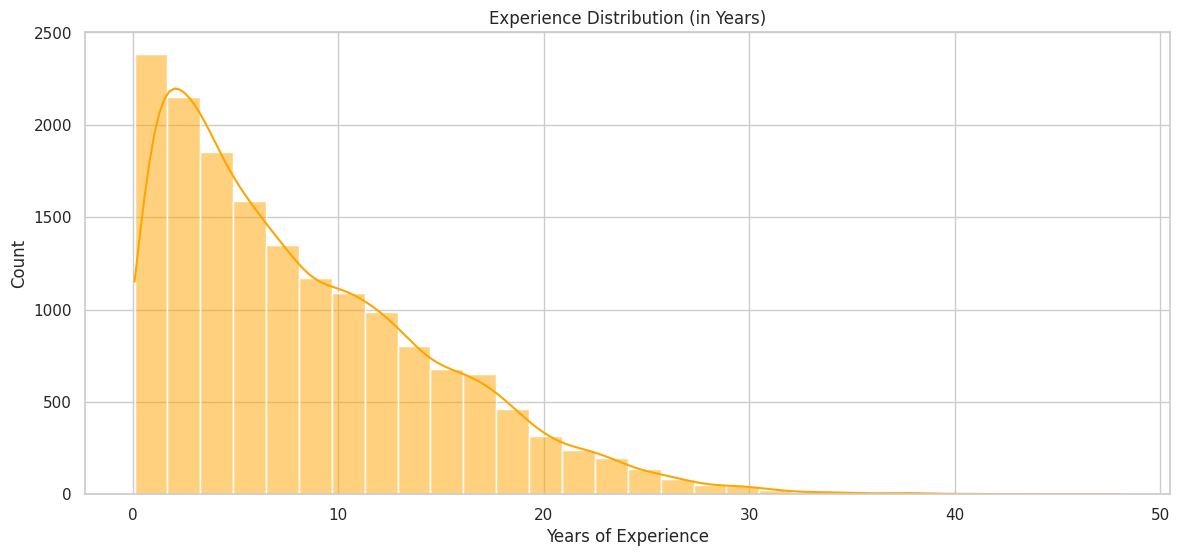

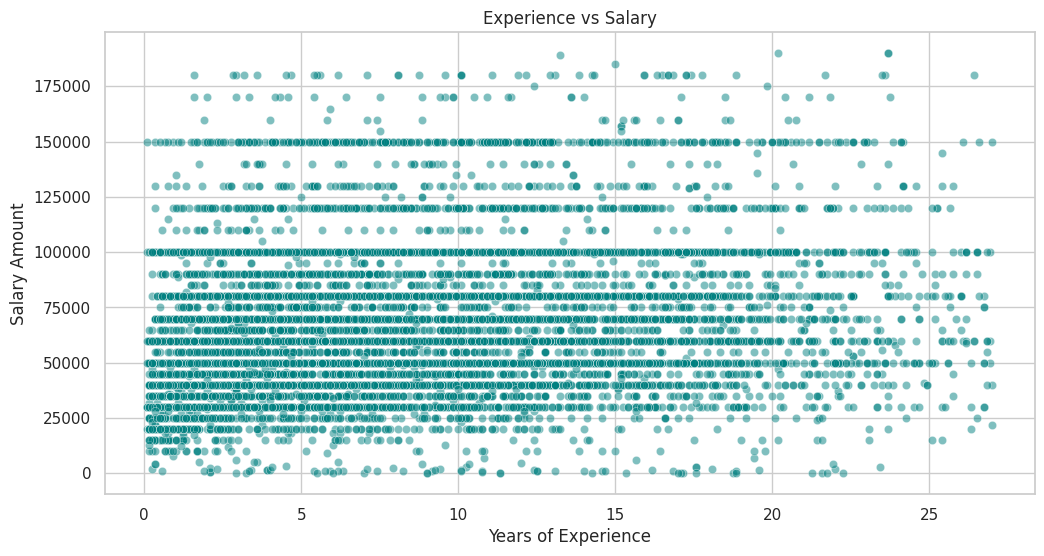

In [ ]:
if 'education.level.name' in df.columns:
    plt.figure(figsize=(12, 6))
    edu_counts = df['education.level.name'].value_counts()
    sns.barplot(x=edu_counts.values, y=edu_counts.index, palette='rocket')
    plt.title('Education Level Distribution')
    plt.xlabel('Count')
    plt.ylabel('Education Level')
    plt.show()

if 'total_experience.months' in df.columns:
    df['experience_years'] = df['total_experience.months'] / 12

    plt.figure(figsize=(14, 6))
    sns.histplot(df['experience_years'].dropna(), bins=30, kde=True, color='orange')
    plt.title('Experience Distribution (in Years)')
    plt.xlabel('Years of Experience')
    plt.ylabel('Count')
    plt.show()

    if 'salary.amount' in df.columns:
        plt.figure(figsize=(12, 6))
        sns.scatterplot(
            x='experience_years',
            y='salary.amount',
            data=df[
                (df['salary.amount'] < df['salary.amount'].quantile(0.99)) &
                (df['experience_years'] < df['experience_years'].quantile(0.99))
            ],
            alpha=0.5,
            color='teal'
        )
        plt.title('Experience vs Salary')
        plt.xlabel('Years of Experience')
        plt.ylabel('Salary Amount')
        plt.show()

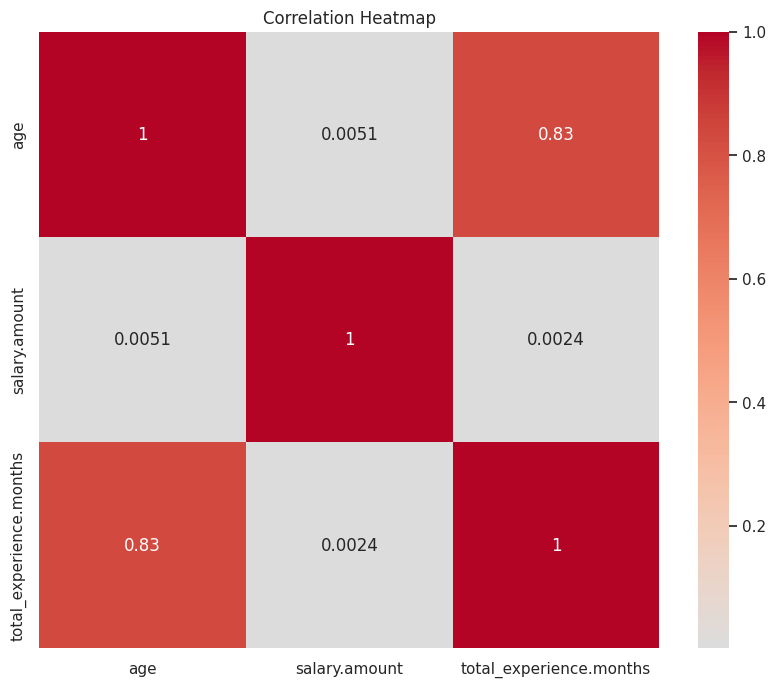

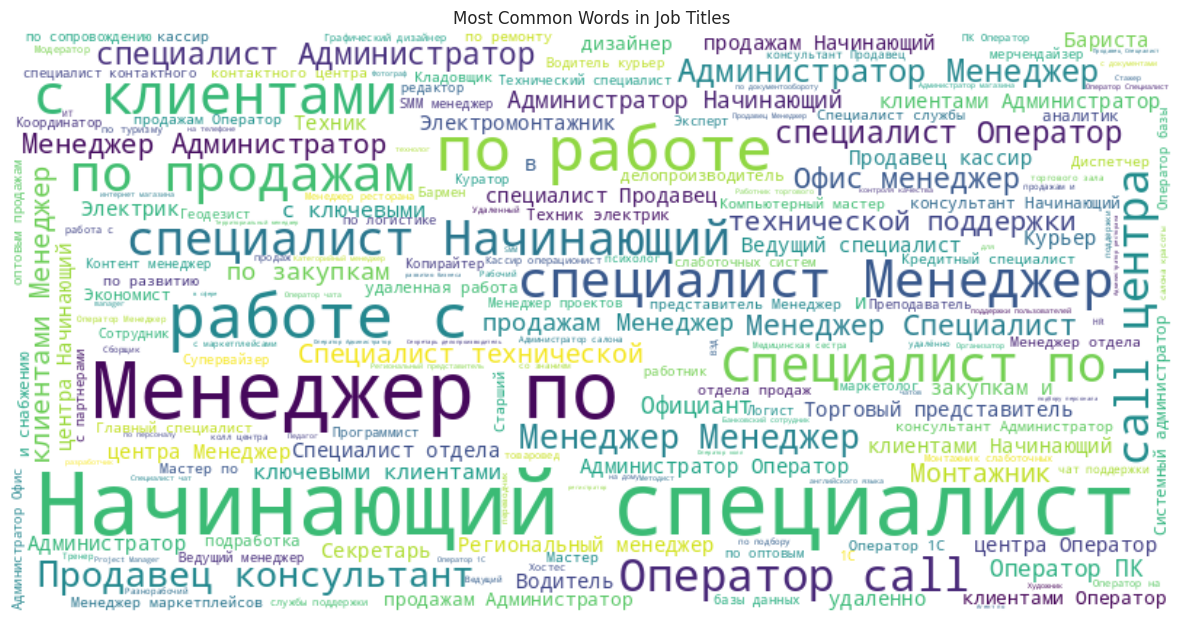

In [ ]:
num_cols = ['age', 'salary.amount', 'total_experience.months']
if all(col in df.columns for col in num_cols):
    plt.figure(figsize=(10, 8))
    sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap')
    plt.show()

if 'title' in df.columns:
    text = ' '.join(title for title in df['title'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Common Words in Job Titles')
    plt.show()

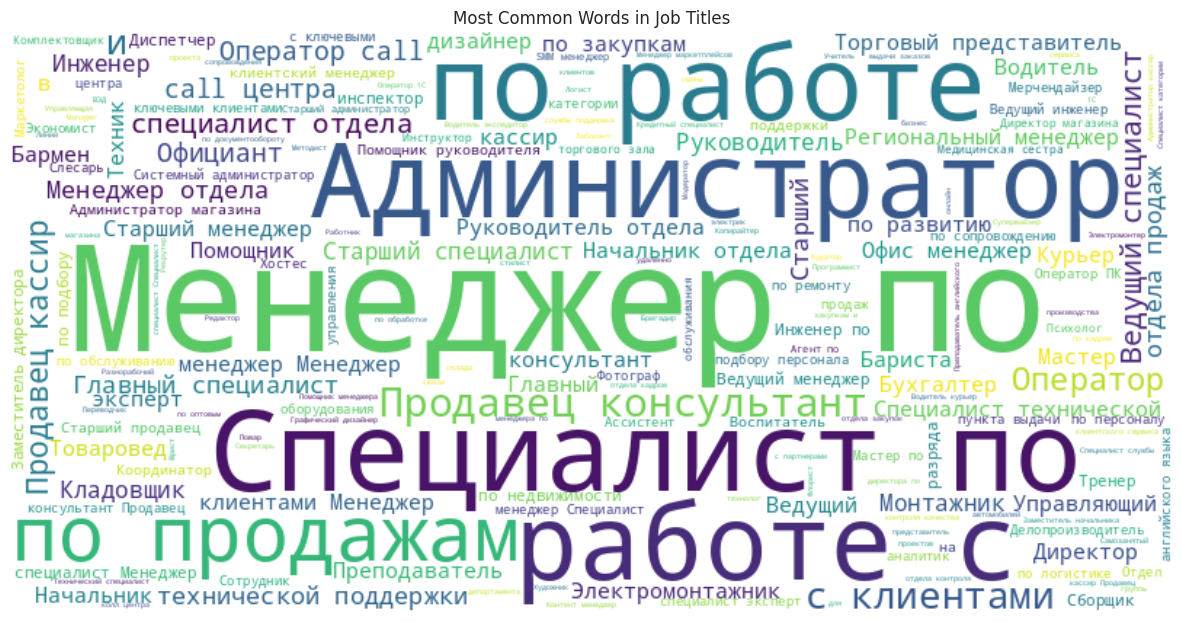

In [ ]:
if 'experience.position' in df.columns:
    text = ' '.join(title for title in df['experience.position'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(15, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Most Common Words in Job Titles')
    plt.show()

<ipython-input-13-3e8276220c22>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


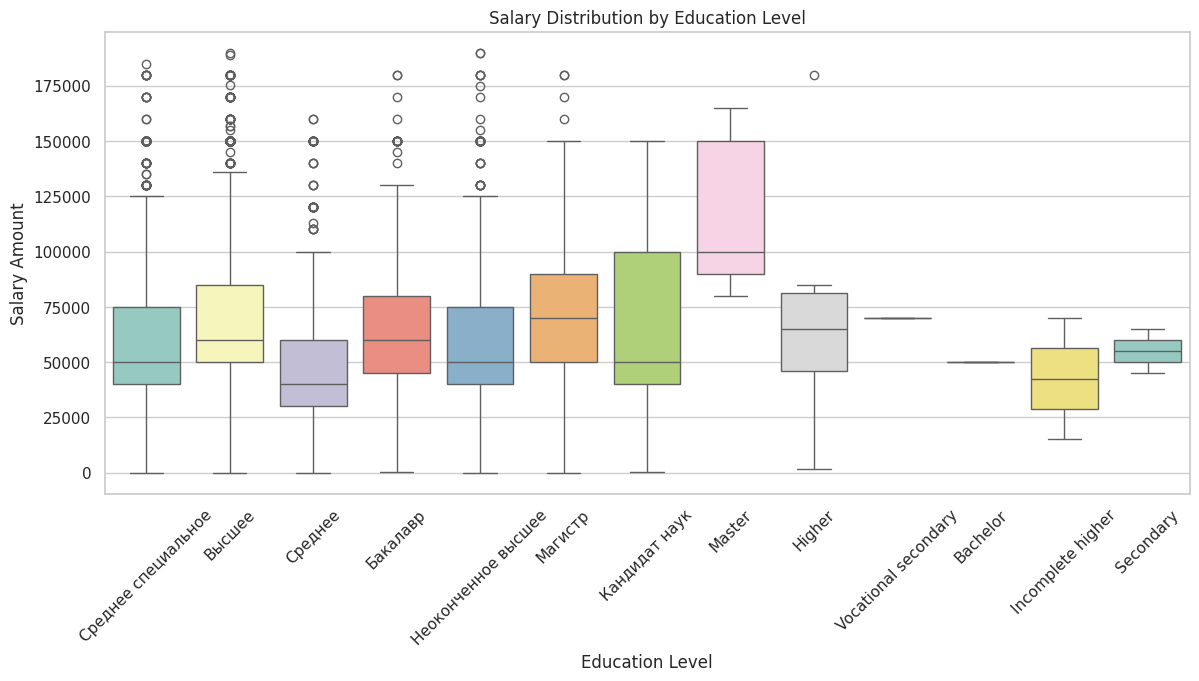

In [ ]:
if all(col in df.columns for col in ['education.level.name', 'salary.amount']):
    plt.figure(figsize=(14, 6))
    sns.boxplot(
        x='education.level.name',
        y='salary.amount',
        data=df[df['salary.amount'] < df['salary.amount'].quantile(0.99)],
        palette='Set3'
    )
    plt.title('Salary Distribution by Education Level')
    plt.xlabel('Education Level')
    plt.ylabel('Salary Amount')
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
threshold = 80000

null_counts = df.isnull().sum()

columns_to_drop = null_counts[null_counts > threshold].index.tolist()

df = df.drop(columns=columns_to_drop)

print(f"Удалено колонок: {len(columns_to_drop)}")
print("Удаленные колонки:", columns_to_drop)
print("\nНовая форма датасета:", df.shape)

Удалено колонок: 0
Удаленные колонки: []

Новая форма датасета: (20247, 57)


Основные статистики salary.amount:
count    1.358500e+04
mean     1.614511e+05
std      8.359635e+06
min      1.000000e+00
25%      4.000000e+04
50%      6.000000e+04
75%      8.000000e+04
90%      1.000000e+05
95%      1.500000e+05
99%      2.000000e+05
max      9.523535e+08
Name: salary.amount, dtype: float64


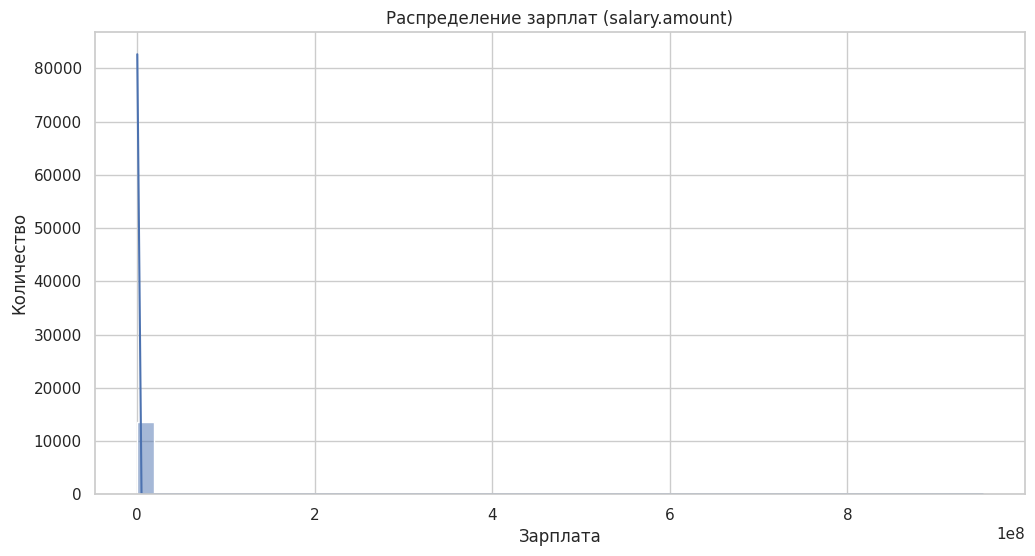

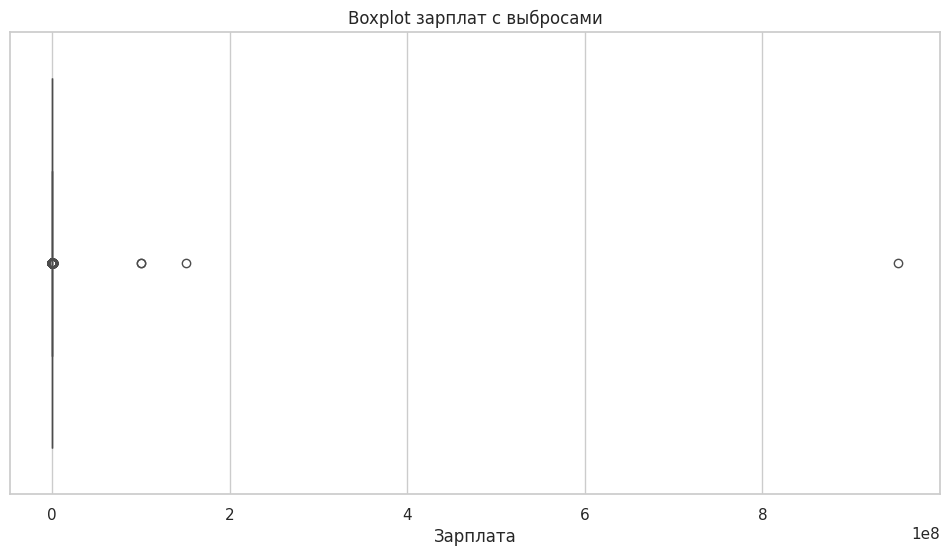


Границы выбросов по методу IQR:
Нижняя граница: -20000.00
Верхняя граница: 140000.00

Количество выбросов: 705
Процент выбросов: 3.48%


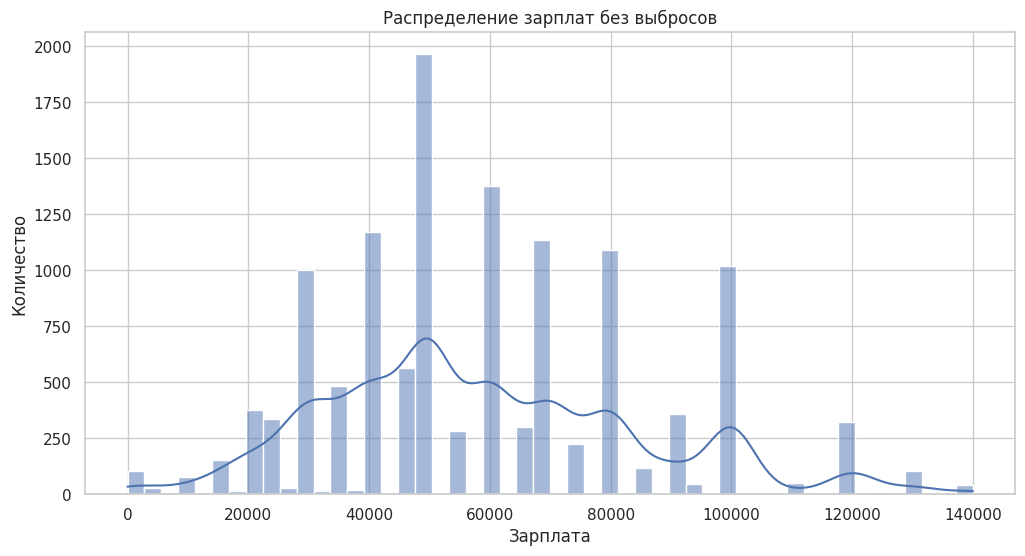

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Основные статистики
print("Основные статистики salary.amount:")
print(df['salary.amount'].describe(percentiles=[.25, .5, .75, .9, .95, .99]))

# 2. Гистограмма распределения
plt.figure(figsize=(12, 6))
sns.histplot(df['salary.amount'].dropna(), bins=50, kde=True)
plt.title('Распределение зарплат (salary.amount)')
plt.xlabel('Зарплата')
plt.ylabel('Количество')
plt.show()

# 3. Boxplot для визуализации выбросов
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['salary.amount'])
plt.title('Boxplot зарплат с выбросами')
plt.xlabel('Зарплата')
plt.show()

# 4. Расчет границ выбросов по правилу 1.5*IQR
Q1 = df['salary.amount'].quantile(0.25)
Q3 = df['salary.amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"\nГраницы выбросов по методу IQR:")
print(f"Нижняя граница: {lower_bound:.2f}")
print(f"Верхняя граница: {upper_bound:.2f}")

# 5. Анализ выбросов
outliers = df[(df['salary.amount'] < lower_bound) | (df['salary.amount'] > upper_bound)]
print(f"\nКоличество выбросов: {len(outliers)}")
print(f"Процент выбросов: {len(outliers)/len(df)*100:.2f}%")

# 6. Визуализация без выбросов
plt.figure(figsize=(12, 6))
sns.histplot(df[(df['salary.amount'] >= lower_bound) &
               (df['salary.amount'] <= upper_bound)]['salary.amount'],
             bins=50, kde=True)
plt.title('Распределение зарплат без выбросов')
plt.xlabel('Зарплата')
plt.ylabel('Количество')
plt.show()

In [ ]:
# Топ-10 самых высоких зарплат
print("\nТоп-10 самых высоких зарплат:")
print(df['salary.amount'].sort_values(ascending=False).head(10))

# Анализ выбросов по другим параметрам
if 'age' in df.columns and 'total_experience.months' in df.columns:
    print("\nСредний возраст для выбросов по зарплате:")
    print(outliers['age'].mean())

    print("\nСредний опыт для выбросов по зарплате (лет):")
    print(outliers['total_experience.months'].mean()/12)


Топ-10 самых высоких зарплат:
3318     952353475.0
1571     150300000.0
11319    100000000.0
248      100000000.0
4574       1000000.0
16316      1000000.0
1742       1000000.0
1745       1000000.0
11581       999999.0
18065       500000.0
Name: salary.amount, dtype: float64

Средний возраст для выбросов по зарплате:
35.22984562607204

Средний опыт для выбросов по зарплате (лет):
12.009923664122136


Удалено строк с возрастом < 18 лет: 2967
Осталось строк: 17280
Процент удаленных строк: 14.65%

Минимальный возраст после очистки: 16.0


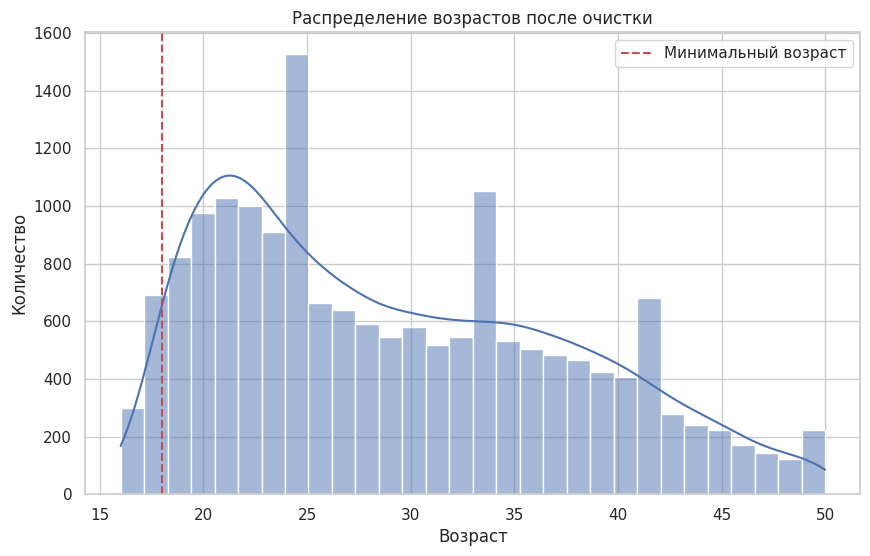

In [ ]:
original_rows = len(df)

df = df[df['age'] >= 16]

removed_rows = original_rows - len(df)
print(f"Удалено строк с возрастом < 18 лет: {removed_rows}")
print(f"Осталось строк: {len(df)}")
print(f"Процент удаленных строк: {removed_rows/original_rows*100:.2f}%")

print("\nМинимальный возраст после очистки:", df['age'].min())

plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Распределение возрастов после очистки')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.axvline(x=18, color='r', linestyle='--', label='Минимальный возраст')
plt.legend()
plt.show()

In [ ]:
df.columns

Index(['vacancy_type', 'id_resumes', 'area_orig', 'salary_orig',
       'created_at_orig', 'updated_at_orig', 'title', 'created_at_res',
       'updated_at_res', 'age', 'certificate', 'can_view_full_info',
       'hidden_fields', 'id', 'favorited', 'viewed', 'marked', 'area.id',
       'area.name', 'gender.id', 'gender.name', 'owner.id',
       'owner.comments.counters.total', 'platform.id', 'education.level.id',
       'education.level.name', 'salary.amount', 'salary.currency',
       'total_experience.months', 'last_negotiation.employer_state.id',
       'last_negotiation.employer_state.name', 'last_negotiation.created_at',
       'experience.start', 'experience.end', 'experience.company',
       'experience.company_id', 'experience.position',
       'experience.employer.id', 'experience.employer.name',
       'experience.area.id', 'experience.area.name', 'experience.industry.id',
       'experience.industry.name', 'education.primary.id',
       'education.primary.name', 'education.p

In [ ]:
df=df.drop(columns=['id_resumes', 'salary_orig', 'created_at_orig', 'title', 'created_at_res',
                  'updated_at_res', 'certificate', 'can_view_full_info',
       'hidden_fields', 'id', 'favorited', 'viewed', 'marked', 'area.id',
       'area.name', 'gender.name', 'owner.id',
       'owner.comments.counters.total', 'platform.id', 'education.level.id', 'experience.start', 'experience.company',
       'experience.position', 'education.primary.id', 'education.primary.name',
       'education.primary.organization', 'education.primary.result',
       'education.primary.year', 'education.primary.education_level.id',
       'education.primary.education_level.name'])

In [ ]:
df.head(10)

vacancy_type        area_orig           updated_at_orig   age gender.id  \
0    Агент ГАП              Чита  2025-01-08T16:18:32+0300  18.0    female   
1    Агент ГАП              Чита  2025-01-07T13:05:04+0300  19.0    female   
3    Агент ГАП              Чита  2025-01-05T02:54:27+0300  25.0      male   
4    Агент ГАП              Чита  2025-01-03T16:14:09+0300  17.0    female   
5      Агент ТМ         Оренбург  2024-12-28T23:32:35+0300  20.0    female   
6    Агент ГАП              Чита  2025-01-03T15:20:55+0300  32.0    female   
7    Агент ГАП           Саратов  2024-11-05T14:41:13+0300  23.0    female   
9      Агент ТМ  Нижний Новгород  2025-01-05T00:22:24+0300  23.0    female   
12   Агент ГАП           Саратов  2024-11-05T12:36:29+0300  22.0    female   
13   Агент ГАП           Саратов  2024-11-05T13:14:47+0300  42.0    female   

   education.level.name  salary.amount salary.currency  \
0               Среднее            NaN             NaN   
1   Среднее специальное        40000.0             RUR   
3   Среднее специальное            NaN             NaN   
4               Среднее            NaN             NaN   
5   Среднее специальное        30000.0             RUR   
6               Среднее        35000.0             RUR   
7              Бакалавр        25000.0             RUR   
9                Высшее            NaN             NaN   
12  Среднее специальное        60000.0             RUR   
13               Высшее        60000.0             RUR   

    total_experience.months last_negotiation.employer_state.id  ...  \
0                       NaN                                NaN  ...   
1                       5.0                                NaN  ...   
3                      37.0                    phone_interview  ...   
4                       2.0                                NaN  ...   
5                      34.0                    phone_interview  ...   
6                      83.0                    phone_interview  ...   
7                       NaN                                NaN  ...   
9                      29.0                    phone_interview  ...   
12                     36.0                                NaN  ...   
13                    239.0                                NaN  ...   

   experience.area.name experience.industry.id experience.industry.name  \
0                   NaN                    NaN                      NaN   
1                   NaN                    NaN                      NaN   
3                   NaN                    NaN                      NaN   
4                   NaN                    NaN                      NaN   
5                   NaN                    NaN                      NaN   
6                   NaN                    NaN                      NaN   
7                   NaN                    NaN                      NaN   
9                   NaN                    NaN                      NaN   
12                  NaN                    NaN                      NaN   
13              Саратов                    NaN                      NaN   

    education.primary.university_acronym  education.primary.name_id  \
0                                    NaN                        NaN   
1                                    NaN                        NaN   
3                                    NaN                        NaN   
4                                    NaN                        NaN   
5                                    ОГУ                    44227.0   
6                                    NaN                        NaN   
7             СГУ им. Н.Г. Чернышевского                    43738.0   
9                  Мининский университет                    44970.0   
12               Вавиловский университет                    42949.0   
13                               РАНХиГС                    39639.0   

   education.primary.organization_id  education.primary.result_id  \
0                                NaN          

In [ ]:
invalid_exp = df['total_experience.months'] > 80*12
print(f"\nКоличество строк с опытом > 80 лет: {invalid_exp.sum()}")


Количество строк с опытом > 80 лет: 0


In [ ]:
df = df[~(df['total_experience.months'] >= df['age']*12)].copy()
print(f"Осталось строк: {len(df)}")

Осталось строк: 17280


In [ ]:
original_rows = df.shape[0]

df = df.dropna(subset=['salary.amount'])

print(f"Удалено строк: {original_rows - df.shape[0]}")
print(f"Осталось строк: {df.shape[0]}")
print(f"Новые пропуски в salary.amount: {df['salary.amount'].isnull().sum()}")

Удалено строк: 5583
Осталось строк: 11697
Новые пропуски в salary.amount: 0


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# EDA of Prepared Dataset

In [3]:
df2 = pd.read_csv('/content/dataset_with_company_count_M (2).csv', sep=';')

<ipython-input-3-0b0fa3a4cb68>:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('/content/dataset_with_company_count_M (2).csv', sep=';')


Количество значений в vacancy_type:
vacancy_type
Агент ГАП                          22278
Агент ТМ                           15014
Менеджер по поддержке продаж        8619
Менеджер по сохранению клиентов     5828
Агент ВТМ                           4515
Инсталлятор                         3103
3ЛТП                                 299
2ЛТП                                  34
Name: count, dtype: int64

Описательная статистика по salary.amount:
                                 count          mean   median      min  \
vacancy_type                                                             
2ЛТП                                34  58088.235294  55000.0  35000.0   
3ЛТП                               299  70329.431438  70000.0  20000.0   
Агент ВТМ                         4515  60187.793134  60000.0  20000.0   
Агент ГАП                        22278  55410.528324  50000.0  20000.0   
Агент ТМ                         15014  53879.979552  50000.0  20000.0   
Инсталлятор                       31

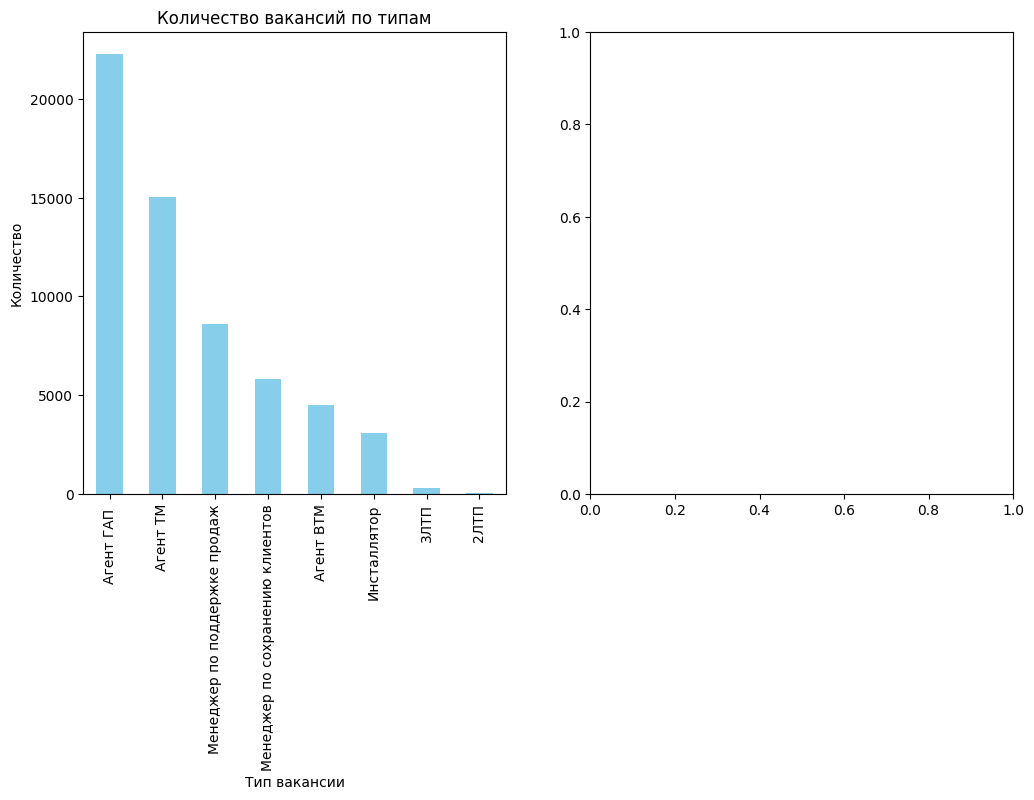

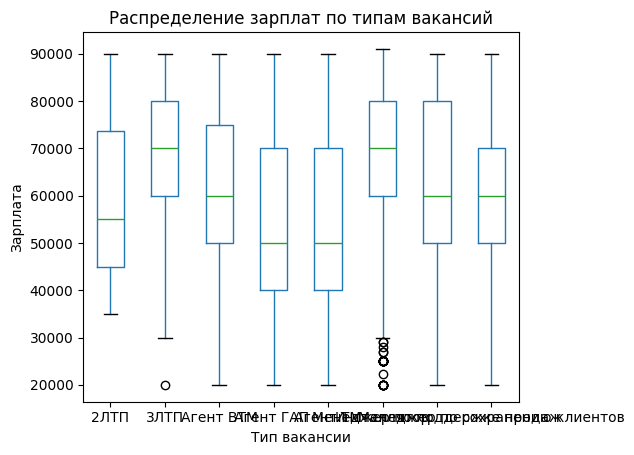

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Предположим, что df - это ваш DataFrame с данными
# Пример данных (замените на ваши реальные данные)

df = df2

# 1. Количество значений в vacancy_type
value_counts = df['vacancy_type'].value_counts()
print("Количество значений в vacancy_type:")
print(value_counts)

# 2. Описательная статистика по salary.amount для каждого vacancy_type
salary_stats = df.groupby('vacancy_type')['salary.amount'].agg(['count', 'mean', 'median', 'min', 'max'])
print("\nОписательная статистика по salary.amount:")
print(salary_stats)

# 3. Графики
plt.figure(figsize=(12, 6))

# График количества вакансий по типам
plt.subplot(1, 2, 1)
value_counts.plot(kind='bar', color='skyblue')
plt.title('Количество вакансий по типам')
plt.xlabel('Тип вакансии')
plt.ylabel('Количество')

# График распределения зарплат по типам (боксплот)
plt.subplot(1, 2, 2)
df.boxplot(column='salary.amount', by='vacancy_type', grid=False, vert=True)
plt.title('Распределение зарплат по типам вакансий')
plt.suptitle('')  # Убираем автоматический заголовок
plt.xlabel('Тип вакансии')
plt.ylabel('Зарплата')

plt.tight_layout()
plt.show()

In [ ]:
print(df2.info())

print(df2.head())

print(df2.isnull().sum())

print(df2.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59690 entries, 0 to 59689
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   vacancy_type                    59690 non-null  object 
 1   area_orig                       59690 non-null  object 
 2   age                             59690 non-null  float64
 3   gender.id                       59690 non-null  object 
 4   education.level.id              59690 non-null  float64
 5   salary.amount                   59690 non-null  float64
 6   total_experience.months         59690 non-null  float64
 7   month                           59690 non-null  int64  
 8   year                            59690 non-null  int64  
 9   inflation_rate                  59690 non-null  float64
 10  interest_rate                   59690 non-null  int64  
 11  Region Name                     59690 non-null  object 
 12  avg_salary_per_region           

In [4]:
df2 = df2[(df2['salary.amount'] >= 29000) & (df2['salary.amount'] <= 91000)]


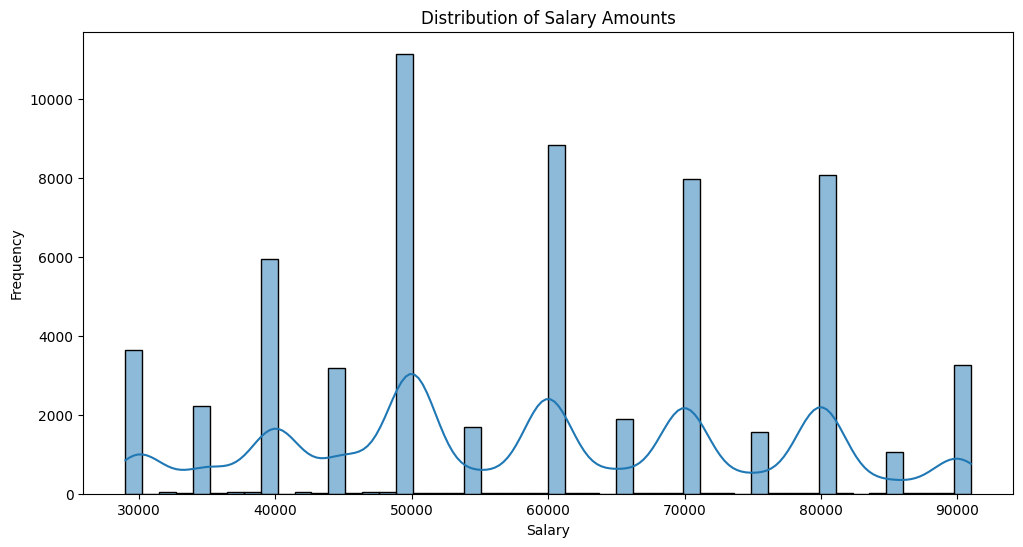

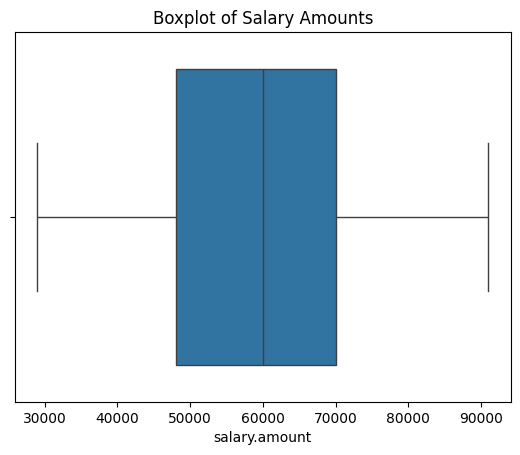

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.histplot(df2['salary.amount'], bins=50, kde=True)
plt.title('Distribution of Salary Amounts')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

sns.boxplot(x=df2['salary.amount'])
plt.title('Boxplot of Salary Amounts')
plt.show()

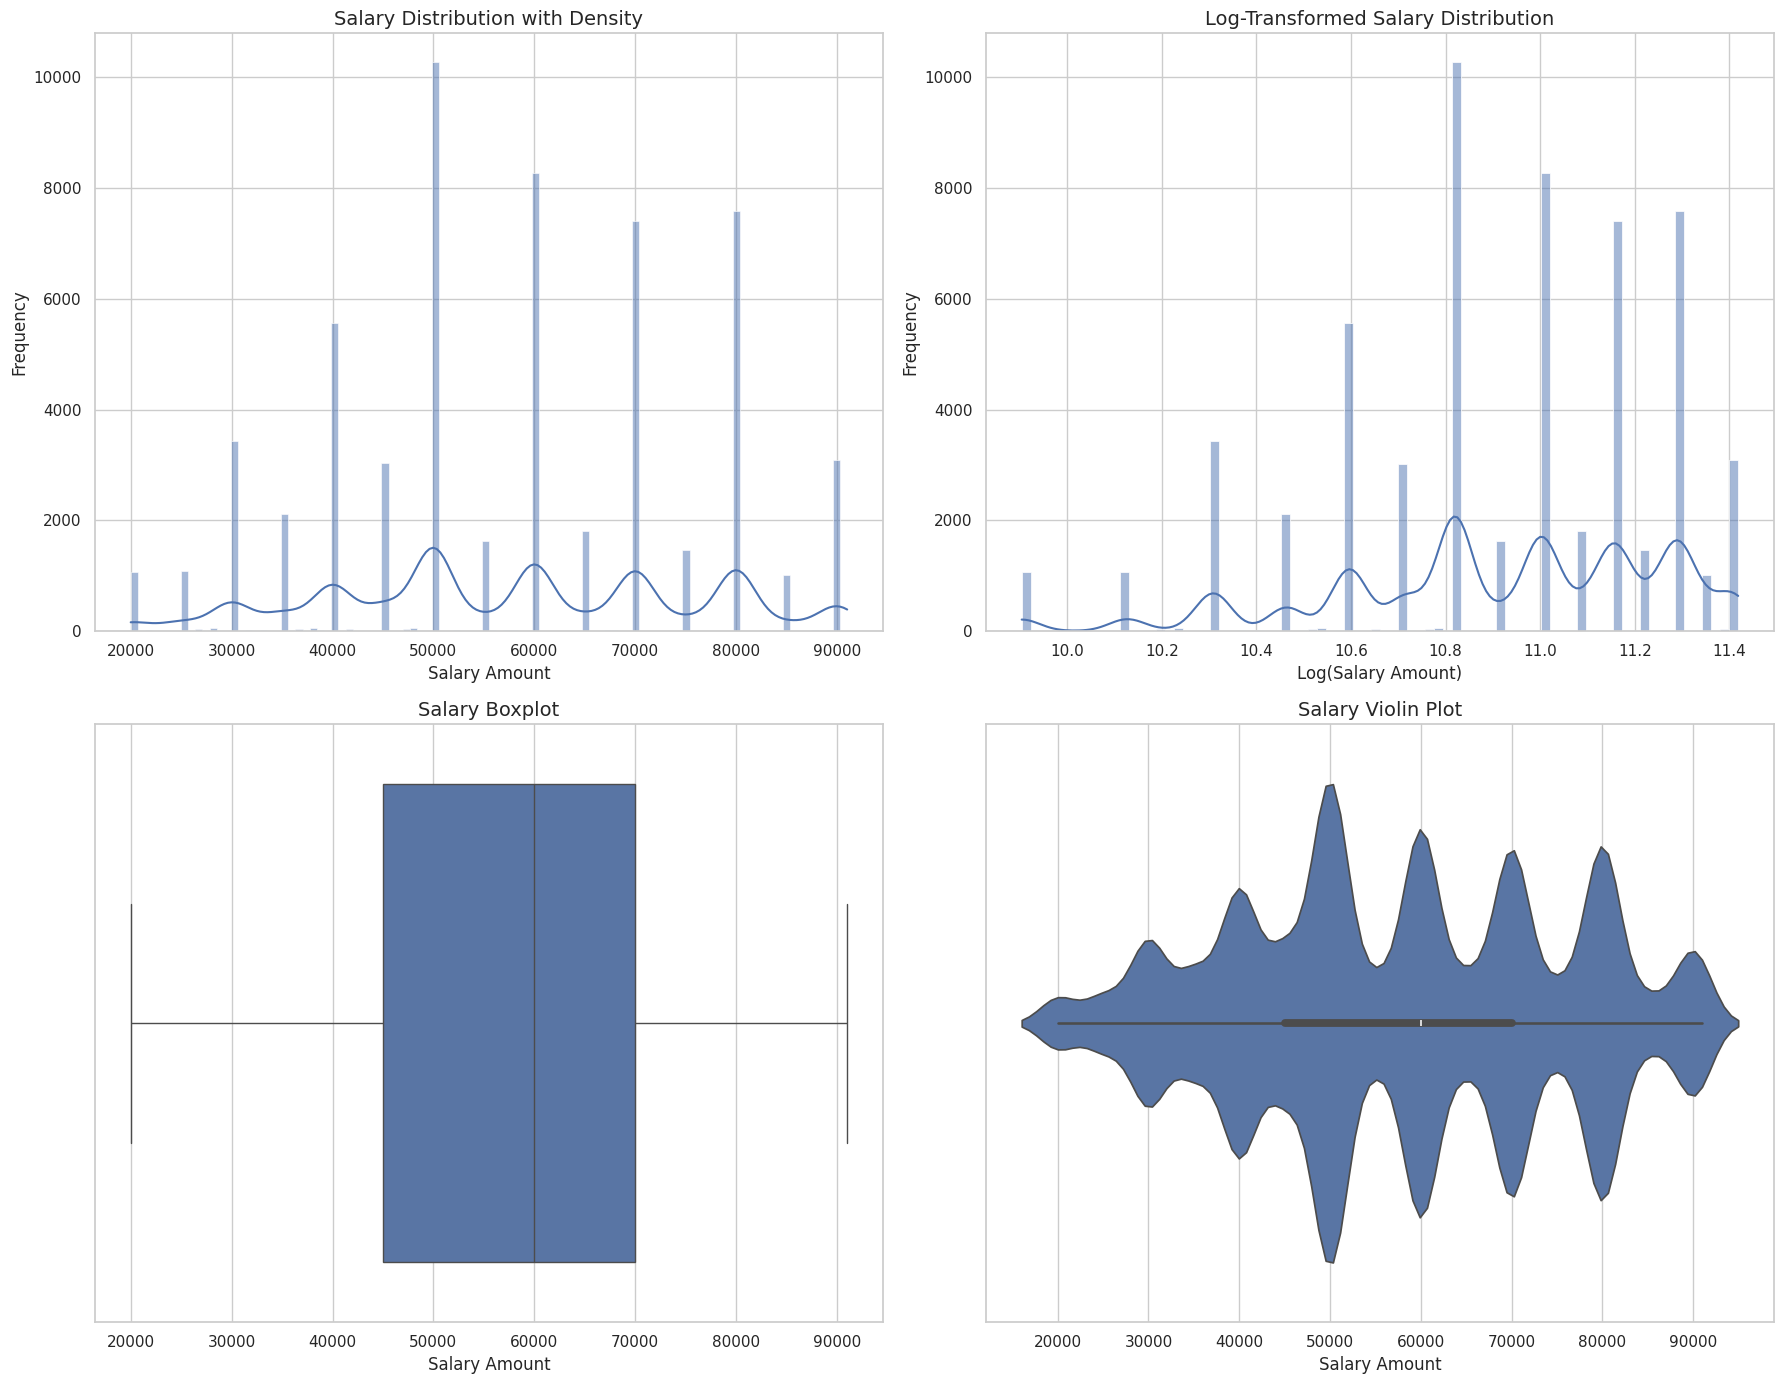


Number of salary outliers (IQR method): 0 (0.00%)


In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(18, 14))

sns.histplot(df2['salary.amount'], bins=100, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Salary Distribution with Density', fontsize=14)
axes[0, 0].set_xlabel('Salary Amount')
axes[0, 0].set_ylabel('Frequency')


log_salary = np.log1p(df2['salary.amount'])
sns.histplot(log_salary, bins=80, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Log-Transformed Salary Distribution', fontsize=14)
axes[0, 1].set_xlabel('Log(Salary Amount)')
axes[0, 1].set_ylabel('Frequency')

sns.boxplot(x=df2['salary.amount'], ax=axes[1, 0])
axes[1, 0].set_title('Salary Boxplot', fontsize=14)
axes[1, 0].set_xlabel('Salary Amount')

sns.violinplot(x=df2['salary.amount'], ax=axes[1, 1])
axes[1, 1].set_title('Salary Violin Plot', fontsize=14)
axes[1, 1].set_xlabel('Salary Amount')

plt.tight_layout()
plt.show()

Q1 = df2['salary.amount'].quantile(0.25)
Q3 = df2['salary.amount'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df2[(df2['salary.amount'] < lower_bound) | (df2['salary.amount'] > upper_bound)]
print(f"\nNumber of salary outliers (IQR method): {len(outliers)} ({len(outliers)/len(df2)*100:.2f}%)")

In [ ]:
print("Overall salary statistics:")
print(df2['salary.amount'].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))

print("\nSalary by gender:")
print(df2.groupby('gender.id')['salary.amount'].describe(percentiles=[0.25, 0.5, 0.75, 0.95]))

print("\nSalary by education level:")
print(df2.groupby('education_level')['salary.amount'].describe(percentiles=[0.25, 0.5, 0.75, 0.95]))

Overall salary statistics:
count    59690.000000
mean     57662.777383
std      17878.741314
min      20000.000000
1%       20000.000000
5%       30000.000000
25%      45000.000000
50%      60000.000000
75%      70000.000000
95%      90000.000000
99%      90000.000000
max      91000.000000
Name: salary.amount, dtype: float64

Salary by gender:
             count          mean           std      min      25%      50%  \
gender.id                                                                   
female     41167.0  54637.421017  17169.583174  20000.0  40000.0  50000.0   
male       18523.0  64386.571884  17588.427254  20000.0  50000.0  70000.0   

               75%      95%      max  
gender.id                             
female     70000.0  80000.0  90000.0  
male       80000.0  90000.0  91000.0  

Salary by education level:


KeyError: 'education_level'

KeyError: 'total_experience.years'

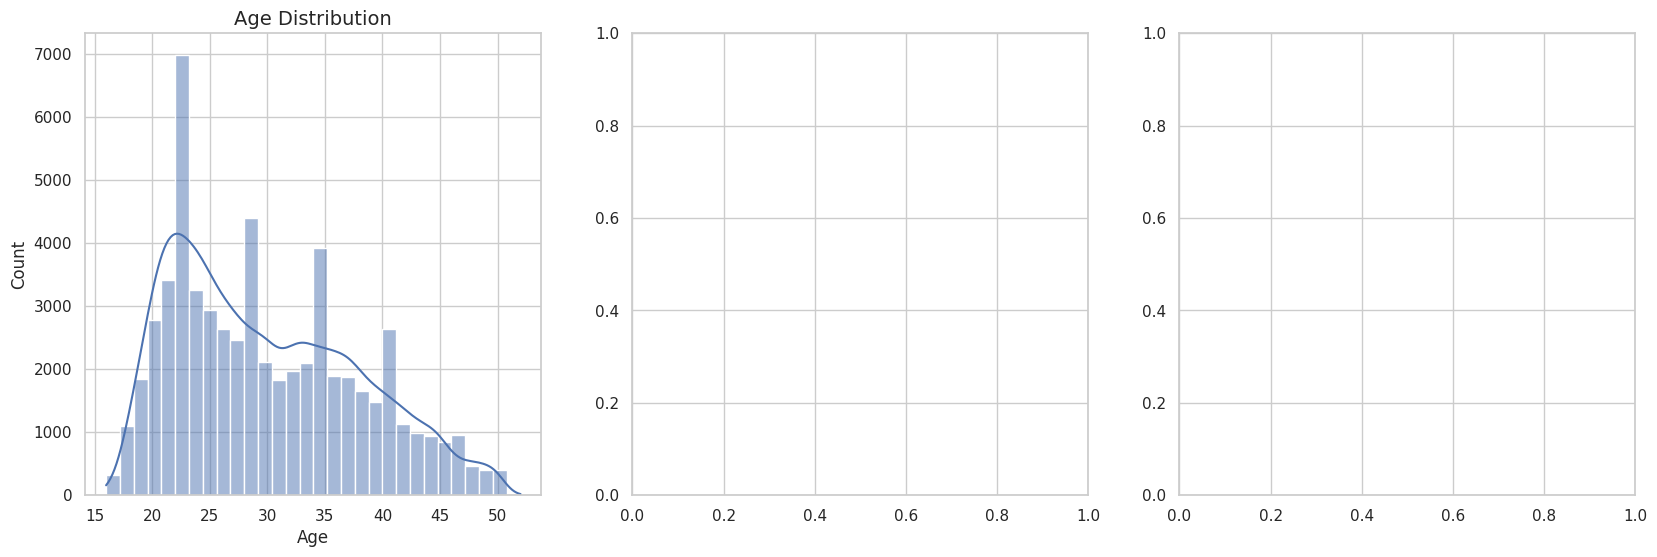

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.histplot(df2['age'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Age Distribution', fontsize=14)
axes[0].set_xlabel('Age')

sns.histplot(df2['total_experience.years'], bins=30, kde=True, ax=axes[1])
axes[1].set_title('Work Experience Distribution', fontsize=14)
axes[1].set_xlabel('Years of Experience')

sns.scatterplot(x='age', y='total_experience.years', data=df2, alpha=0.6, ax=axes[2])
axes[2].set_title('Age vs Work Experience', fontsize=14)
axes[2].set_xlabel('Age')
axes[2].set_ylabel('Years of Experience')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.regplot(x='age', y='salary.amount', data=df2, scatter_kws={'alpha':0.3}, ax=axes[0])
axes[0].set_title('Salary vs Age with Regression Line', fontsize=14)

sns.regplot(x='total_experience.years', y='salary.amount', data=df2, scatter_kws={'alpha':0.3}, ax=axes[1])
axes[1].set_title('Salary vs Experience with Regression Line', fontsize=14)

plt.tight_layout()
plt.show()

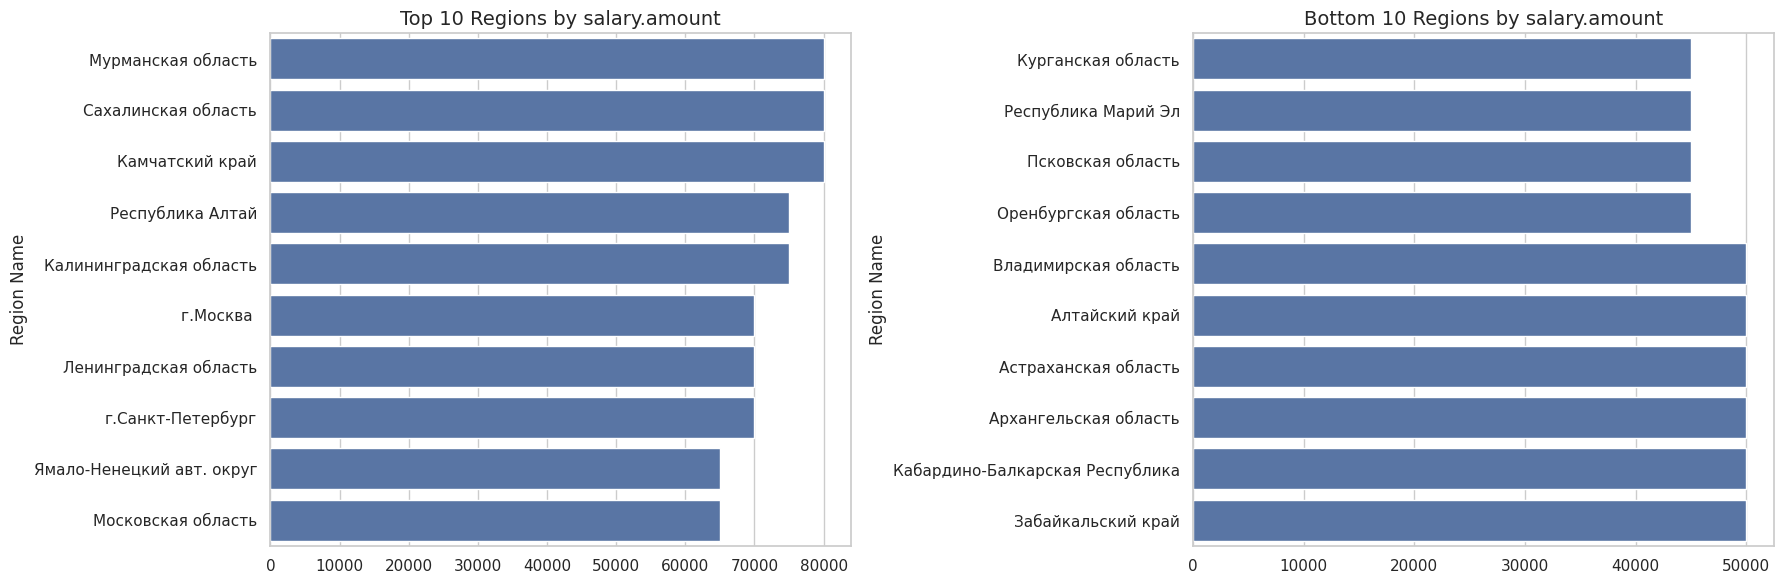

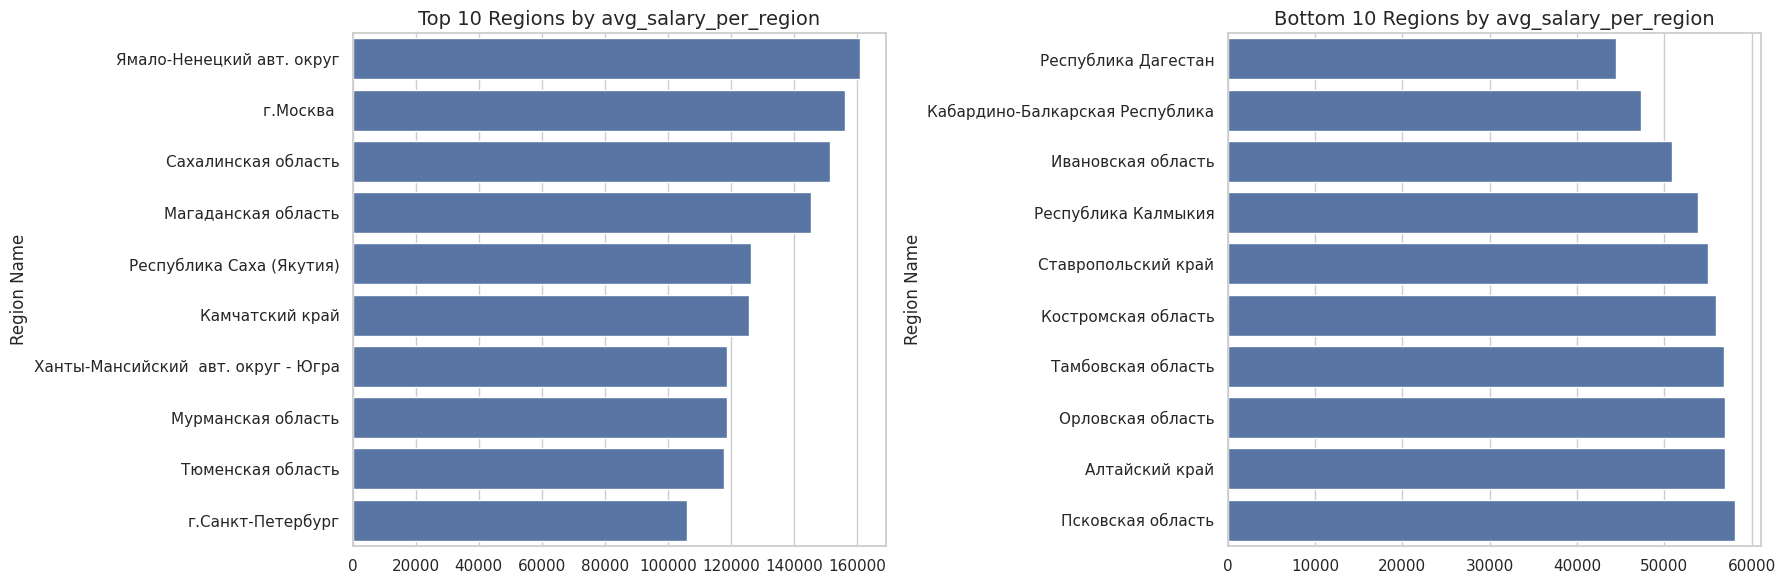

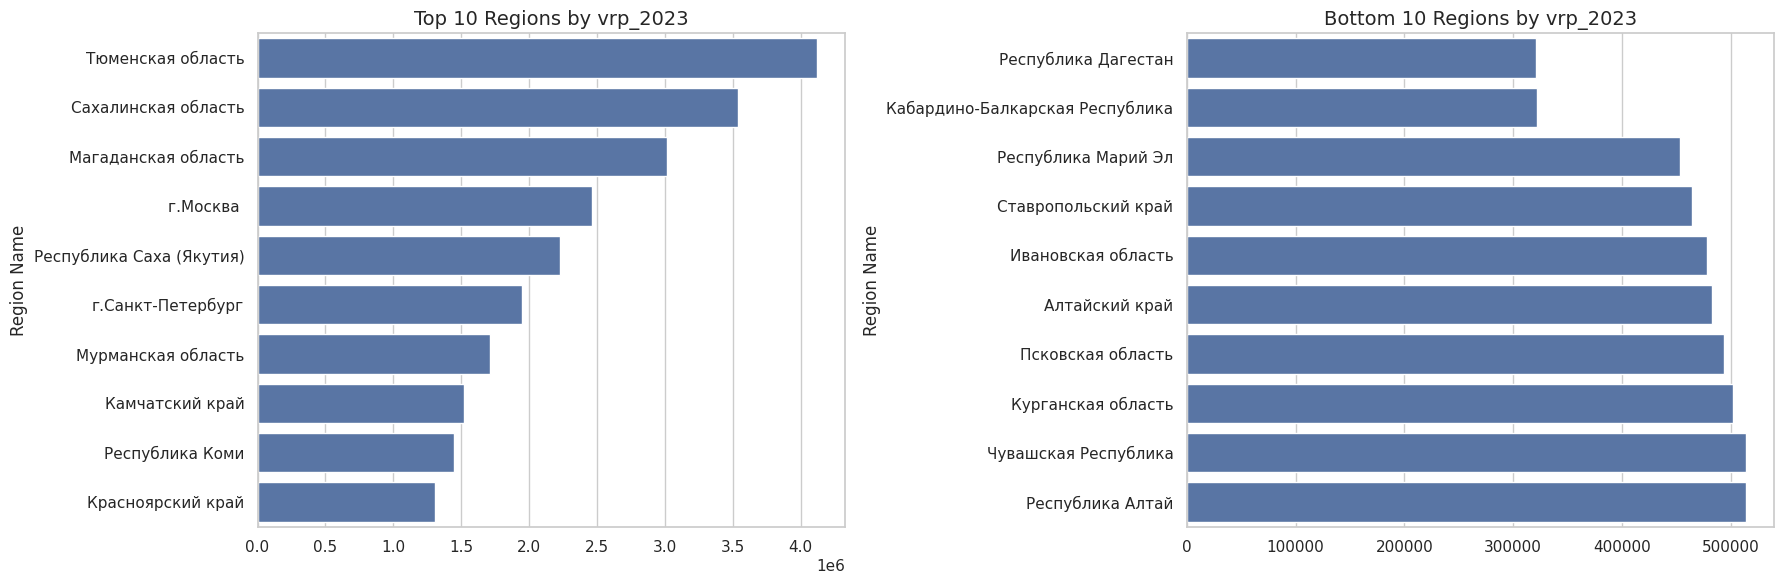

TypeError: agg function failed [how->median,dtype->object]

In [ ]:
metrics = ['salary.amount', 'avg_salary_per_region', 'vrp_2023',
           'appart_price_pervichniy_market', 'median_profit_per_person']

for metric in metrics:
    top_regions = df2.groupby('Region Name')[metric].median().sort_values(ascending=False).head(10)
    bottom_regions = df2.groupby('Region Name')[metric].median().sort_values().head(10)

    fig, axes = plt.subplots(1, 2, figsize=(18, 6))

    sns.barplot(x=top_regions.values, y=top_regions.index, ax=axes[0])
    axes[0].set_title(f'Top 10 Regions by {metric}', fontsize=14)

    sns.barplot(x=bottom_regions.values, y=bottom_regions.index, ax=axes[1])
    axes[1].set_title(f'Bottom 10 Regions by {metric}', fontsize=14)

    plt.tight_layout()
    plt.show()

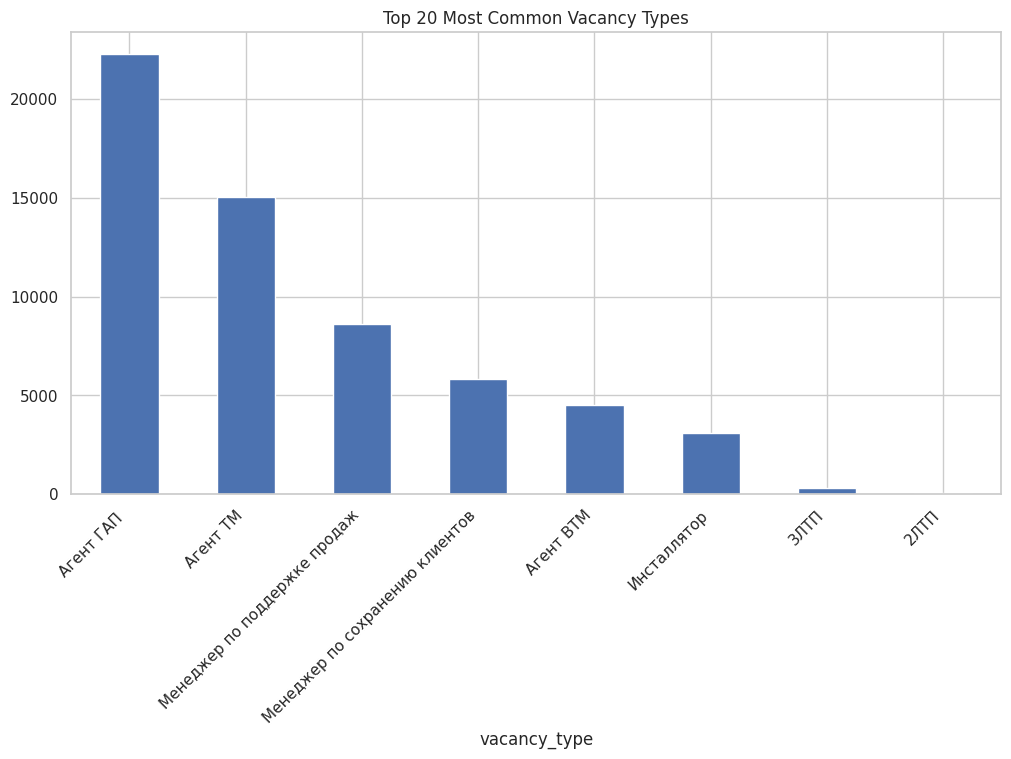

In [ ]:
plt.figure(figsize=(12, 6))
df2['vacancy_type'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 Most Common Vacancy Types')
plt.xticks(rotation=45, ha='right')
plt.show()

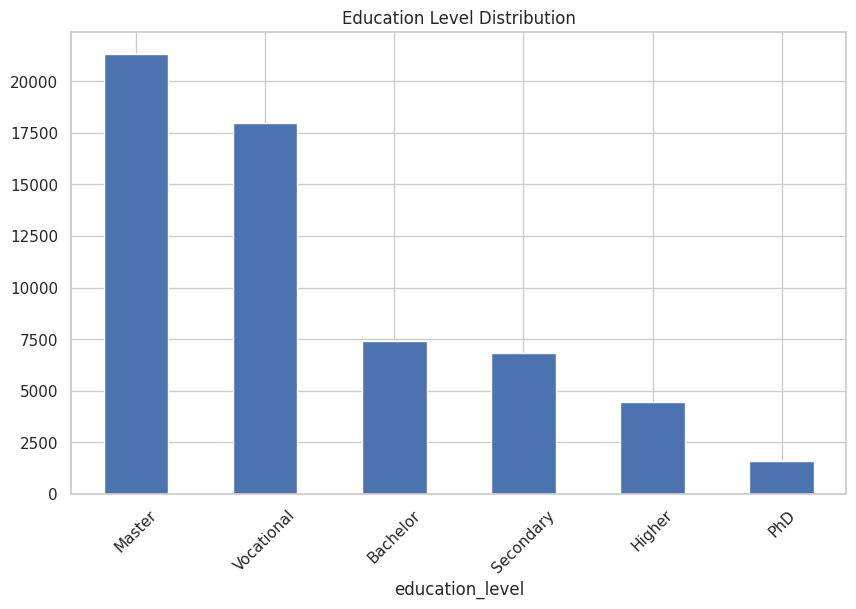

In [ ]:
education_mapping = {
    1: 'Secondary',
    2: 'Vocational',
    3: 'Higher',
    4: 'Bachelor',
    5: 'Master',
    6: 'PhD'
}
df2['education_level'] = df2['education.level.id'].map(education_mapping)

plt.figure(figsize=(10, 6))
df2['education_level'].value_counts().plot(kind='bar')
plt.title('Education Level Distribution')
plt.xticks(rotation=45)
plt.show()

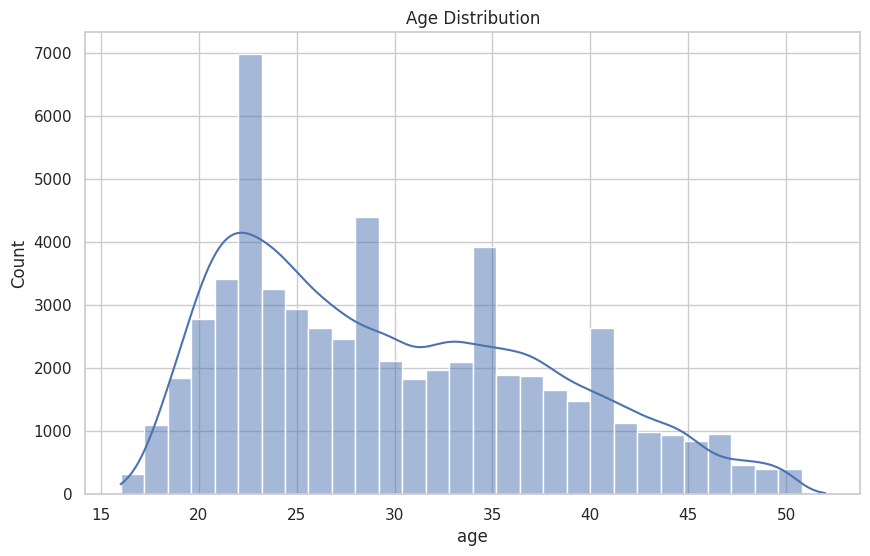

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df2['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()

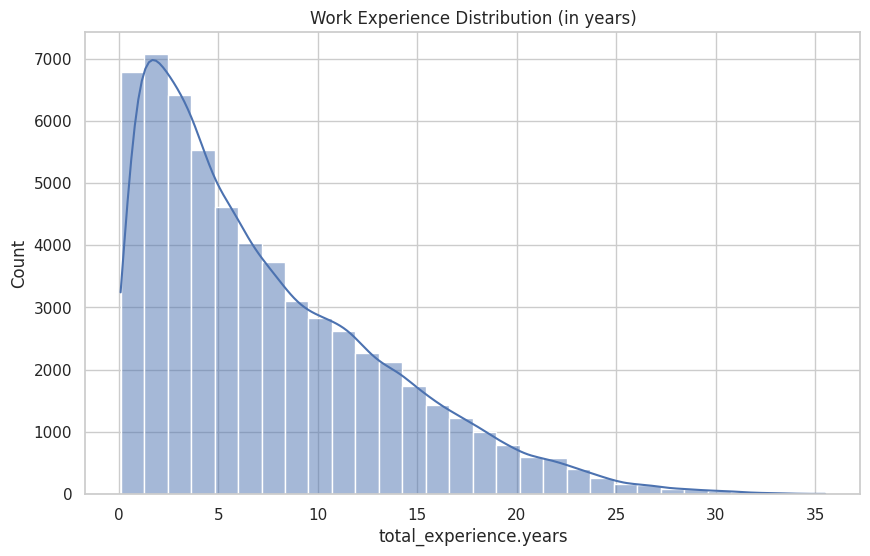

In [ ]:
df2['total_experience.years'] = df2['total_experience.months'] / 12

plt.figure(figsize=(10, 6))
sns.histplot(df2['total_experience.years'], bins=30, kde=True)
plt.title('Work Experience Distribution (in years)')
plt.show()

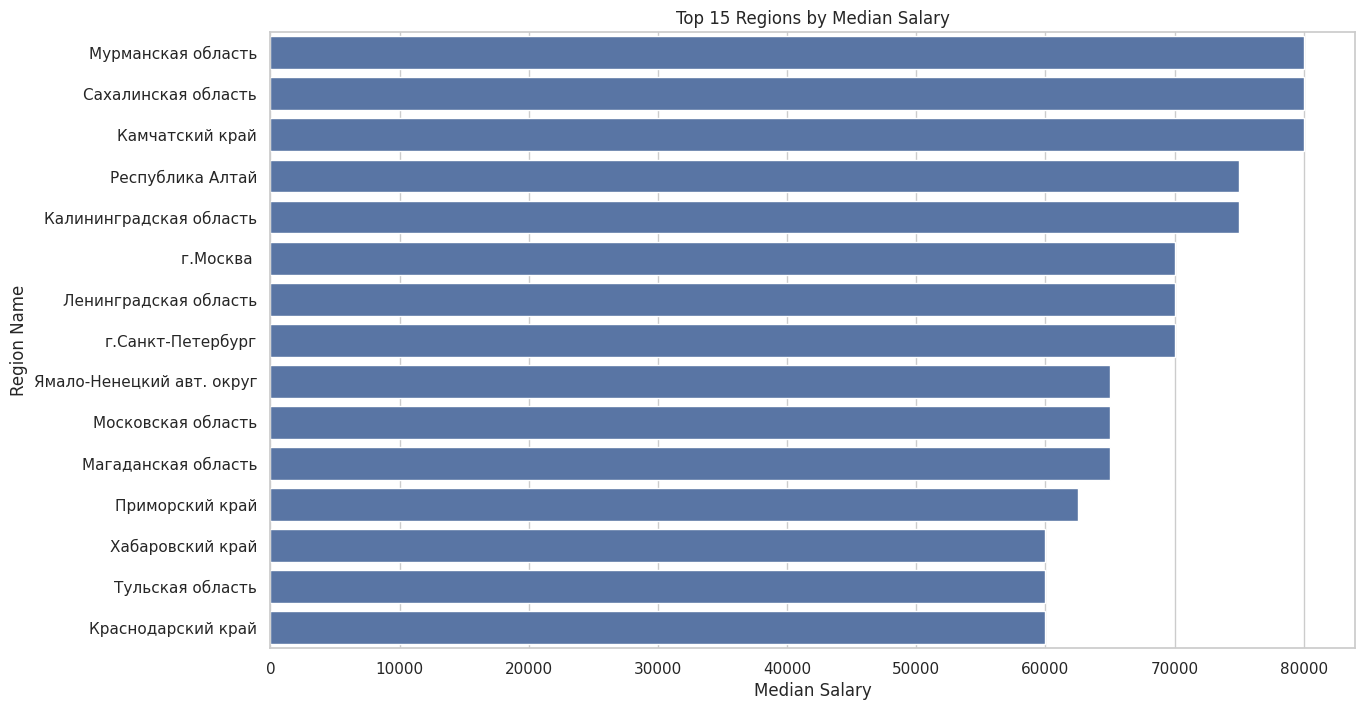

In [ ]:
plt.figure(figsize=(14, 8))
top_regions = df2.groupby('Region Name')['salary.amount'].median().sort_values(ascending=False).head(15)
sns.barplot(x=top_regions.values, y=top_regions.index)
plt.title('Top 15 Regions by Median Salary')
plt.xlabel('Median Salary')
plt.show()

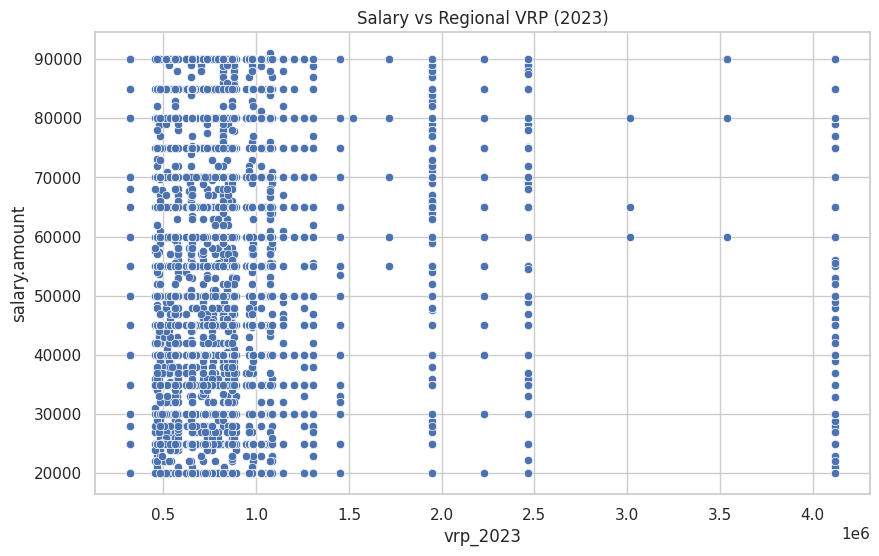

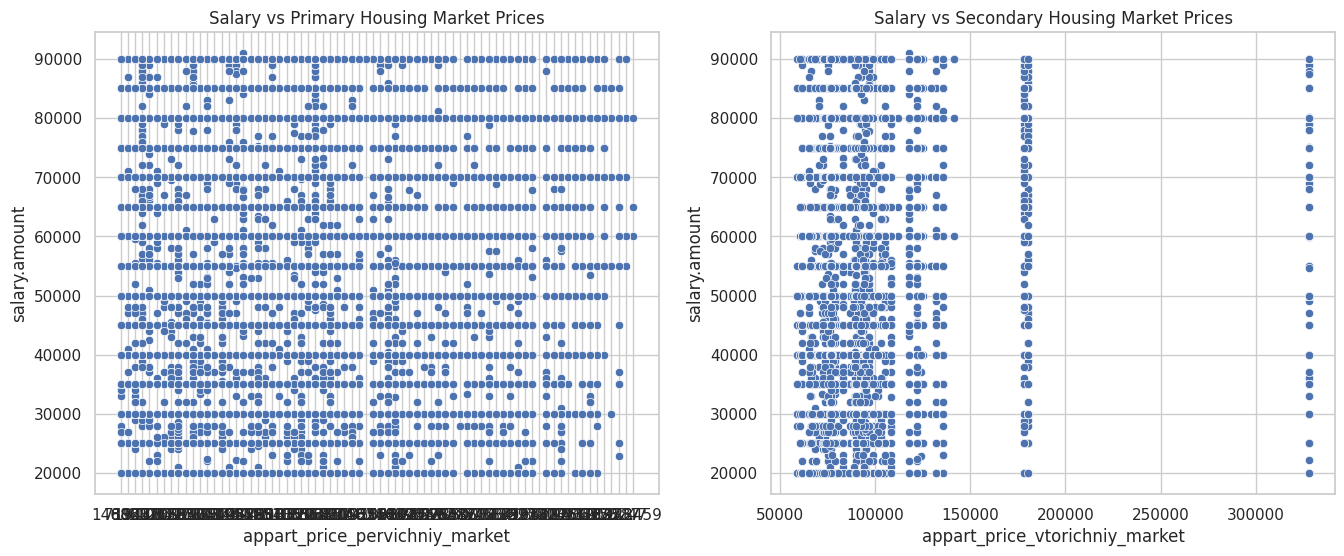

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='vrp_2023', y='salary.amount', data=df2)
plt.title('Salary vs Regional VRP (2023)')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))
sns.scatterplot(x='appart_price_pervichniy_market', y='salary.amount', data=df2, ax=axes[0])
axes[0].set_title('Salary vs Primary Housing Market Prices')
sns.scatterplot(x='appart_price_vtorichniy_market', y='salary.amount', data=df2, ax=axes[1])
axes[1].set_title('Salary vs Secondary Housing Market Prices')
plt.show()

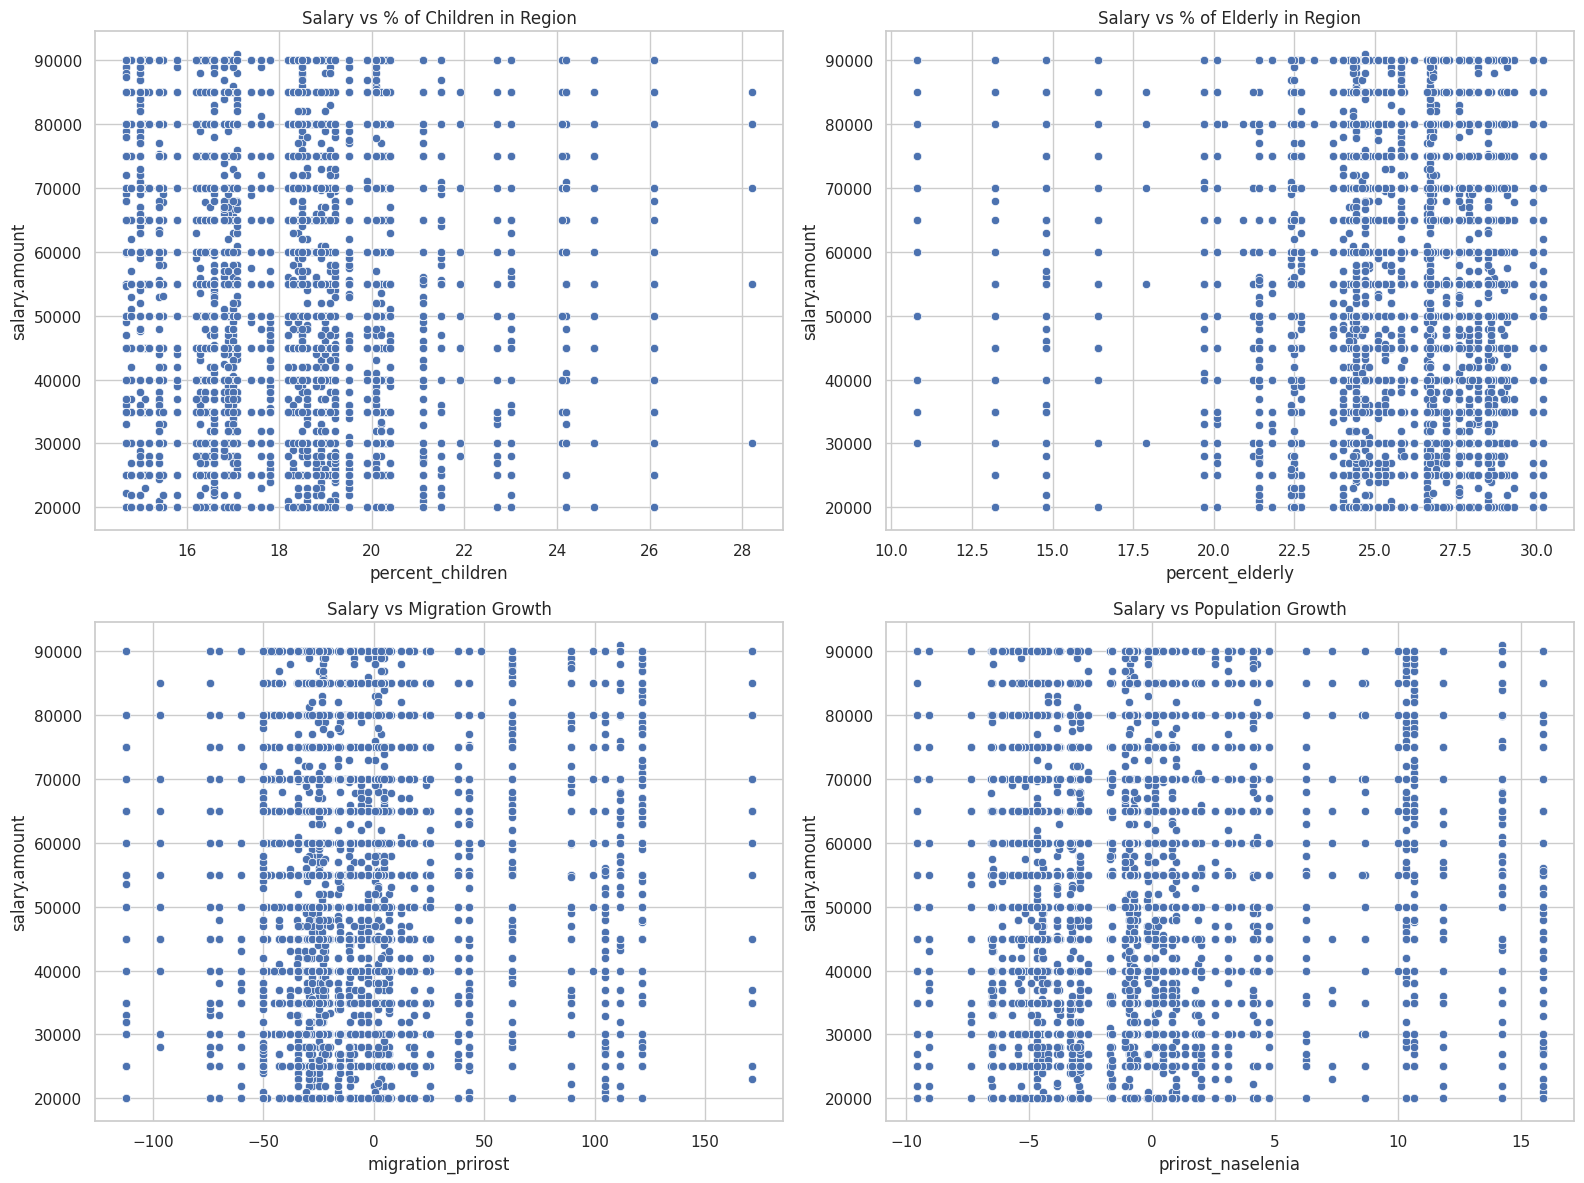

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
sns.scatterplot(x='percent_children', y='salary.amount', data=df2, ax=axes[0, 0])
axes[0, 0].set_title('Salary vs % of Children in Region')
sns.scatterplot(x='percent_elderly', y='salary.amount', data=df2, ax=axes[0, 1])
axes[0, 1].set_title('Salary vs % of Elderly in Region')
sns.scatterplot(x='migration_prirost', y='salary.amount', data=df2, ax=axes[1, 0])
axes[1, 0].set_title('Salary vs Migration Growth')
sns.scatterplot(x='prirost_naselenia', y='salary.amount', data=df2, ax=axes[1, 1])
axes[1, 1].set_title('Salary vs Population Growth')
plt.tight_layout()
plt.show()

<Figure size 1400x600 with 0 Axes>

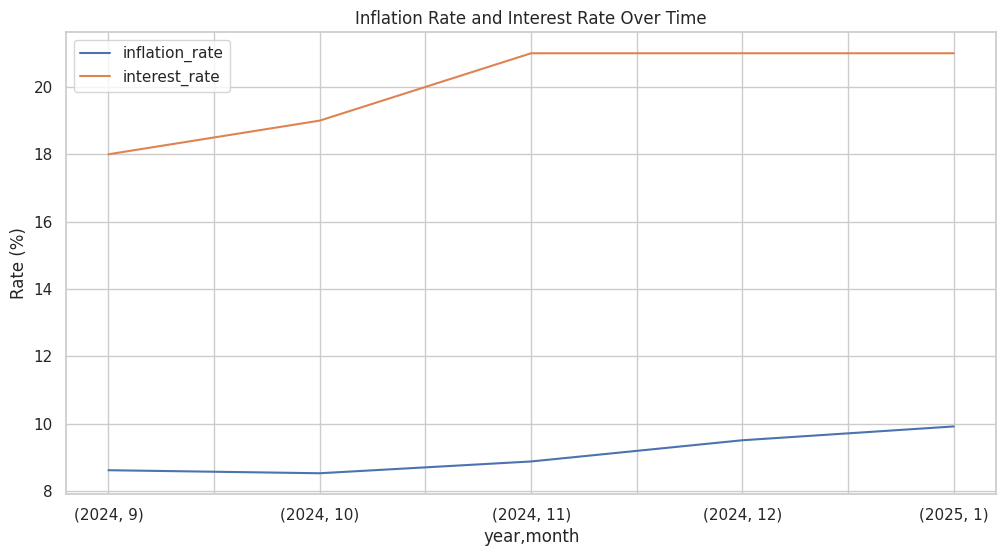

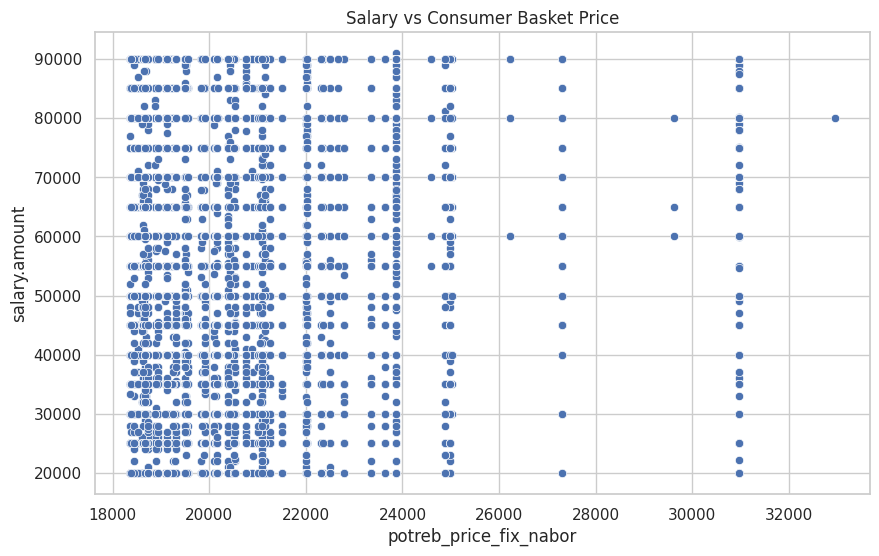

In [ ]:
plt.figure(figsize=(14, 6))
df2.groupby(['year', 'month']).agg({'inflation_rate': 'mean', 'interest_rate': 'mean'}).plot()
plt.title('Inflation Rate and Interest Rate Over Time')
plt.ylabel('Rate (%)')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='potreb_price_fix_nabor', y='salary.amount', data=df2)
plt.title('Salary vs Consumer Basket Price')
plt.show()

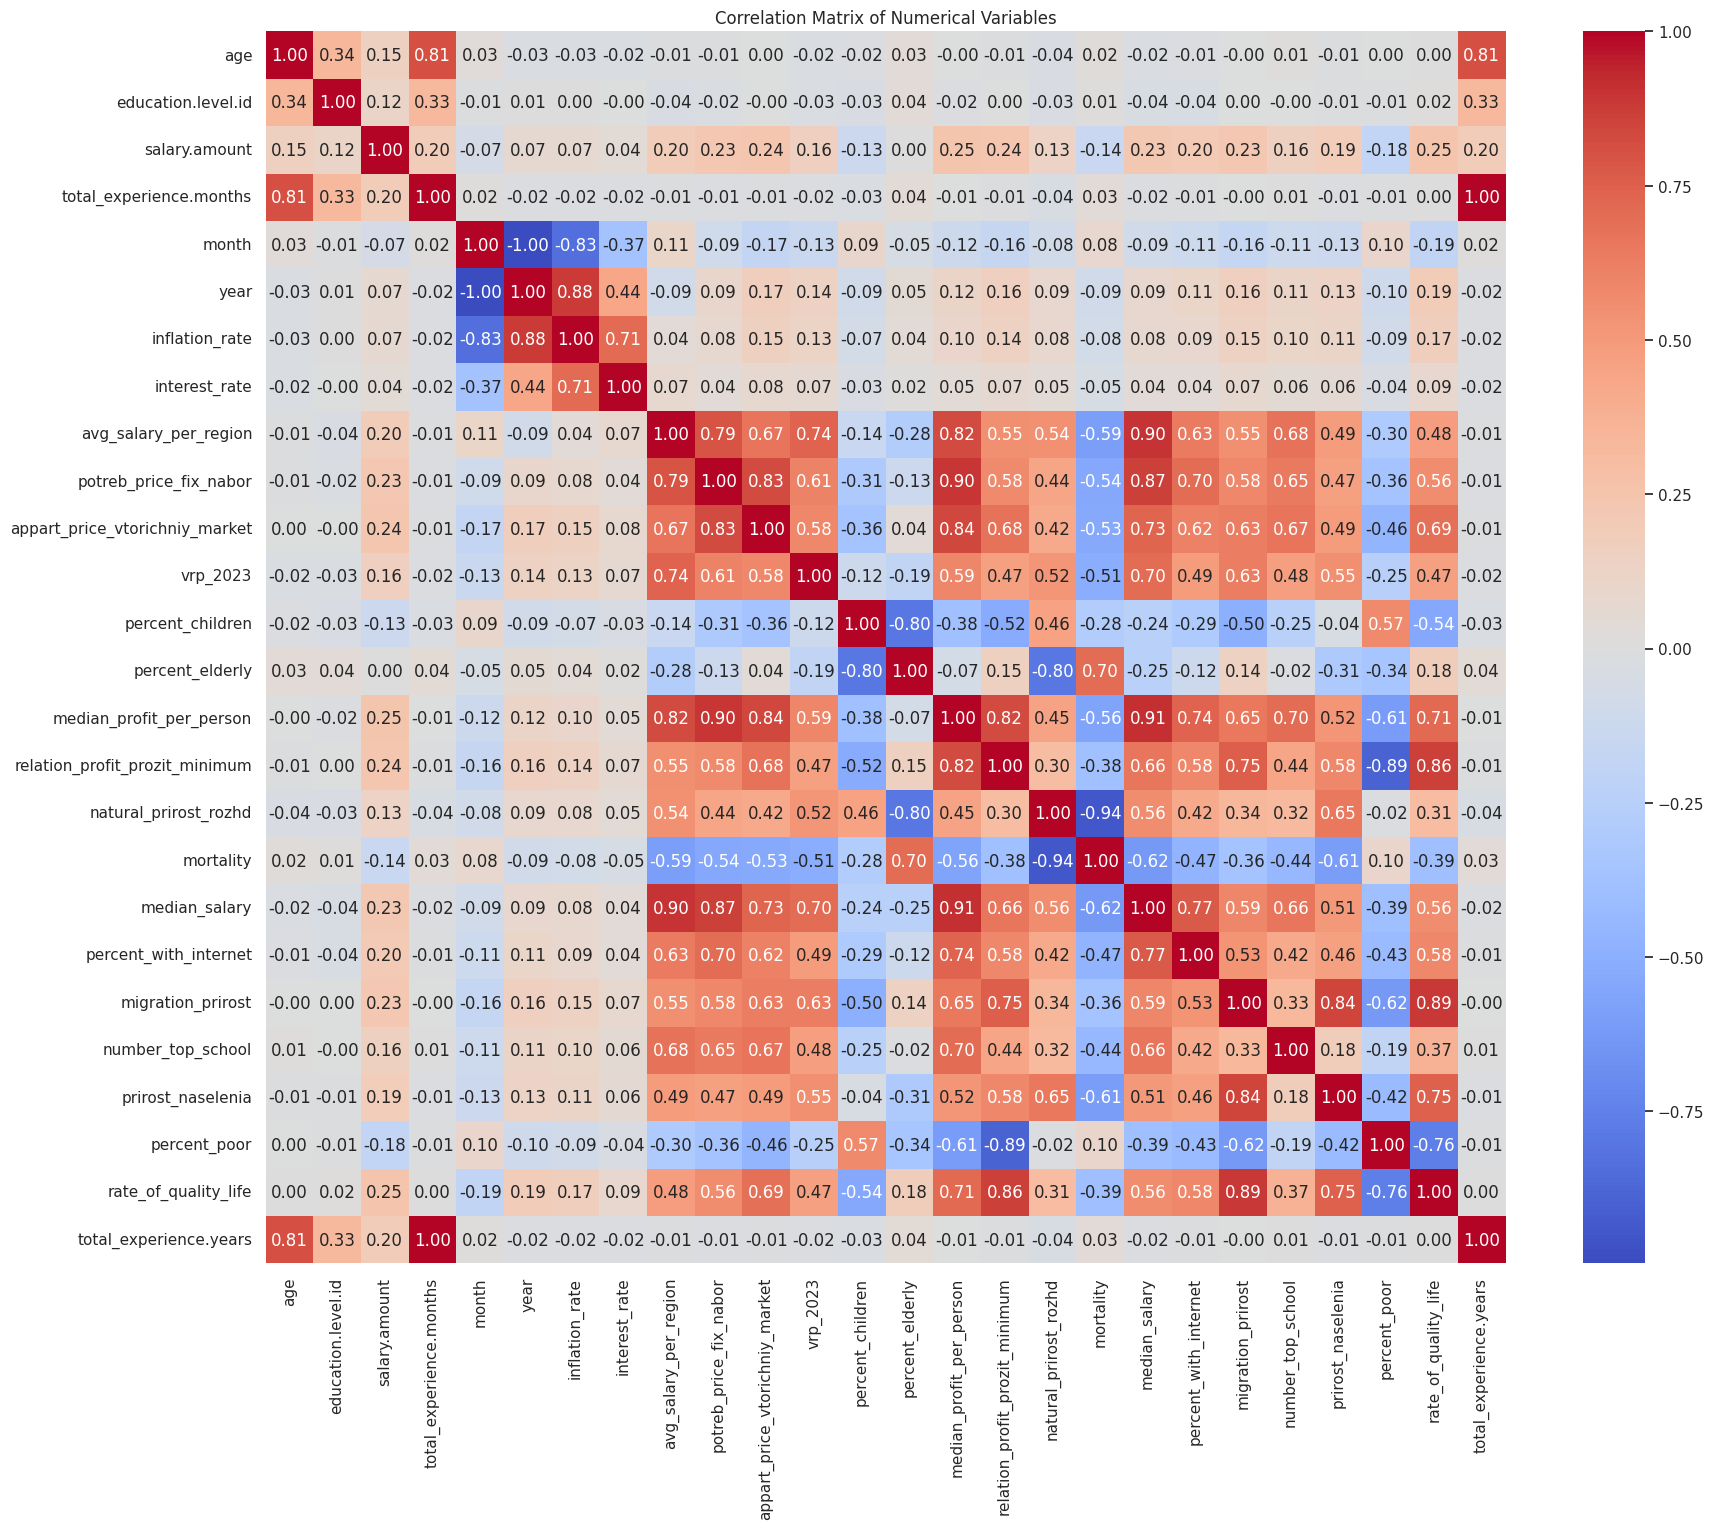

Top correlations with salary:
salary.amount                     1.000000
rate_of_quality_life              0.252352
median_profit_per_person          0.250269
relation_profit_prozit_minimum    0.242623
appart_price_vtorichniy_market    0.236353
potreb_price_fix_nabor            0.234158
migration_prirost                 0.233217
median_salary                     0.227594
percent_with_internet             0.204939
avg_salary_per_region             0.196103
total_experience.years            0.196040
total_experience.months           0.196040
prirost_naselenia                 0.187930
vrp_2023                          0.160738
number_top_school                 0.157639
age                               0.153830
natural_prirost_rozhd             0.127164
education.level.id                0.116919
year                              0.066678
inflation_rate                    0.066262
interest_rate                     0.041840
percent_elderly                   0.002017
month                   

In [ ]:
numerical_cols = df2.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df2[numerical_cols].corr()

plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

salary_corr = correlation_matrix['salary.amount'].sort_values(ascending=False)
print("Top correlations with salary:")
print(salary_corr)

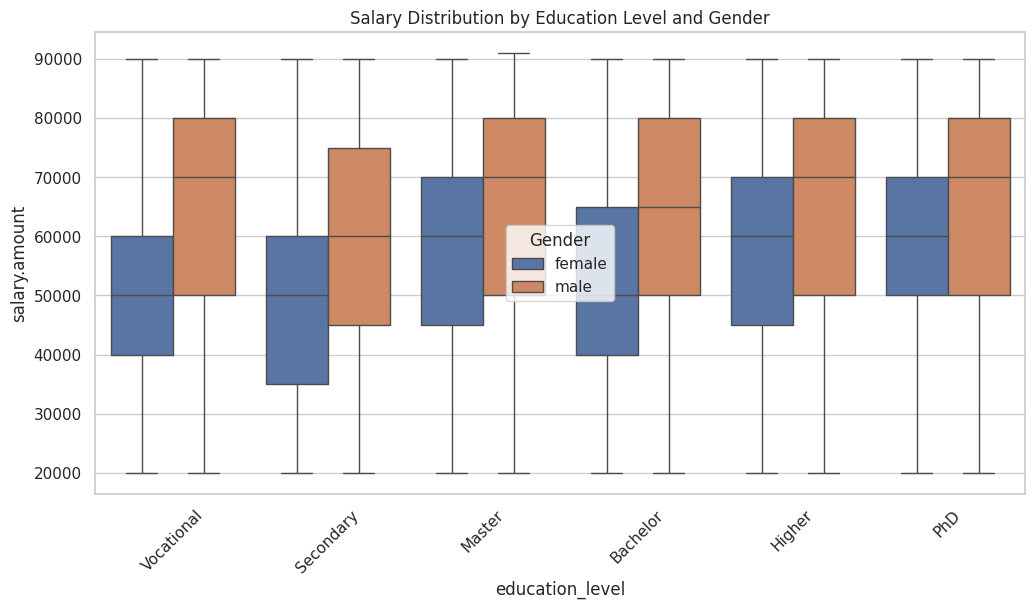

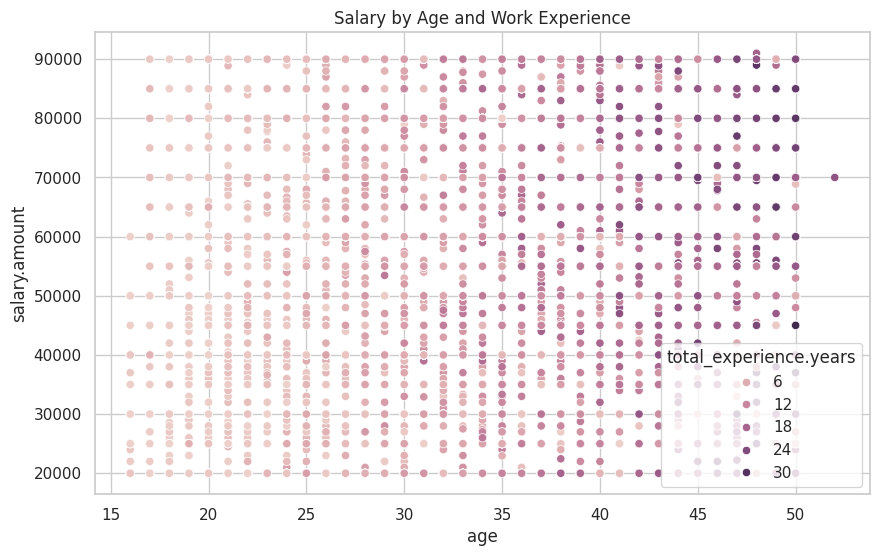

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='education_level', y='salary.amount', hue='gender.id', data=df2)
plt.title('Salary Distribution by Education Level and Gender')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='salary.amount', hue='total_experience.years', data=df2)
plt.title('Salary by Age and Work Experience')
plt.show()